# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographic_density']
N_COMPONENTS = 3

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.discrete, source=Source.majority, past=Past.all, durl=Durl.all, max_distance=2)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = substitution.features(feature,
                                                                sentence_relative='median')
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'source': source,
                         'source_rel': source_rel,
                         'destination': destination,
                         'destination_rel': destination_rel,
                         'h0': substitution.feature_average(feature),
                         'h0_rel': substitution.feature_average(feature,
                                                                sentence_relative='median'),
                         'h0n': substitution.feature_average(feature,
                                                             source_synonyms=True),
                         'h0n_rel': substitution.feature_average(feature,
                                                                 source_synonyms=True,
                                                                 sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 24971 substitutions for model Model(time=Time.discrete, source=Source.majority, past=Past.all, durl=Durl.all, max_distance=2)


  0% (    1 of 24971) |            | Elapsed Time: 0:00:27 ETA:  8 days, 1:01:00

  0% (   67 of 24971) |                    | Elapsed Time: 0:00:28 ETA:  0:05:51

  0% (  137 of 24971) |                    | Elapsed Time: 0:00:29 ETA:  0:05:39

  0% (  209 of 24971) |                    | Elapsed Time: 0:00:30 ETA:  0:05:31

  1% (  280 of 24971) |                    | Elapsed Time: 0:00:31 ETA:  0:05:28

  1% (  313 of 24971) |                    | Elapsed Time: 0:00:32 ETA:  0:05:26

  1% (  385 of 24971) |                    | Elapsed Time: 0:00:33 ETA:  0:05:23

  1% (  456 of 24971) |                    | Elapsed Time: 0:00:34 ETA:  0:05:21

  2% (  523 of 24971) |                    | Elapsed Time: 0:00:35 ETA:  0:05:22

  2% (  594 of 24971) |                    | Elapsed Time: 0:00:36 ETA:  0:05:21

  2% (  625 of 24971) |                    | Elapsed Time: 0:00:36 ETA:  0:05:18

  2% (  690 of 24971) |                    | Elapsed Time: 0:00:37 ETA:  0:05:20

  3% (  756 of 24971) |                    | Elapsed Time: 0:00:38 ETA:  0:05:22

  3% (  822 of 24971) |                    | Elapsed Time: 0:00:39 ETA:  0:05:25

  3% (  897 of 24971) |                    | Elapsed Time: 0:00:40 ETA:  0:05:21

  3% (  937 of 24971) |                    | Elapsed Time: 0:00:41 ETA:  0:05:20

  4% ( 1008 of 24971) |                    | Elapsed Time: 0:00:42 ETA:  0:05:19

  4% ( 1073 of 24971) |                    | Elapsed Time: 0:00:43 ETA:  0:05:19

  4% ( 1122 of 24971) |                    | Elapsed Time: 0:00:44 ETA:  0:06:00

  4% ( 1196 of 24971) |                    | Elapsed Time: 0:00:45 ETA:  0:05:53

  5% ( 1249 of 24971) |#                   | Elapsed Time: 0:00:46 ETA:  0:05:51

  5% ( 1317 of 24971) |#                   | Elapsed Time: 0:00:47 ETA:  0:05:49

  5% ( 1379 of 24971) |#                   | Elapsed Time: 0:00:48 ETA:  0:05:51

  5% ( 1448 of 24971) |#                   | Elapsed Time: 0:00:49 ETA:  0:05:55

  6% ( 1516 of 24971) |#                   | Elapsed Time: 0:00:50 ETA:  0:05:55

  6% ( 1561 of 24971) |#                   | Elapsed Time: 0:00:51 ETA:  0:05:59

  6% ( 1631 of 24971) |#                   | Elapsed Time: 0:00:52 ETA:  0:05:55

  6% ( 1696 of 24971) |#                   | Elapsed Time: 0:00:53 ETA:  0:05:17

  7% ( 1770 of 24971) |#                   | Elapsed Time: 0:00:54 ETA:  0:05:16

  7% ( 1841 of 24971) |#                   | Elapsed Time: 0:00:55 ETA:  0:05:13

  7% ( 1873 of 24971) |#                   | Elapsed Time: 0:00:55 ETA:  0:05:10

  7% ( 1944 of 24971) |#                   | Elapsed Time: 0:00:56 ETA:  0:05:04

  8% ( 2022 of 24971) |#                   | Elapsed Time: 0:00:57 ETA:  0:04:57

  8% ( 2101 of 24971) |#                   | Elapsed Time: 0:00:58 ETA:  0:04:49

  8% ( 2185 of 24971) |#                   | Elapsed Time: 0:01:00 ETA:  0:04:42

  9% ( 2252 of 24971) |#                   | Elapsed Time: 0:01:01 ETA:  0:04:40

  9% ( 2322 of 24971) |#                   | Elapsed Time: 0:01:02 ETA:  0:04:41

  9% ( 2395 of 24971) |#                   | Elapsed Time: 0:01:03 ETA:  0:04:40

  9% ( 2471 of 24971) |#                   | Elapsed Time: 0:01:04 ETA:  0:04:38

 10% ( 2498 of 24971) |##                  | Elapsed Time: 0:01:04 ETA:  0:04:35

 10% ( 2571 of 24971) |##                  | Elapsed Time: 0:01:05 ETA:  0:04:38

 10% ( 2641 of 24971) |##                  | Elapsed Time: 0:01:06 ETA:  0:04:43

 10% ( 2714 of 24971) |##                  | Elapsed Time: 0:01:07 ETA:  0:04:42

 11% ( 2786 of 24971) |##                  | Elapsed Time: 0:01:08 ETA:  0:04:41

 11% ( 2810 of 24971) |##                  | Elapsed Time: 0:01:08 ETA:  0:04:36

 11% ( 2874 of 24971) |##                  | Elapsed Time: 0:01:09 ETA:  0:04:39

 11% ( 2945 of 24971) |##                  | Elapsed Time: 0:01:10 ETA:  0:04:39

 12% ( 3008 of 24971) |##                  | Elapsed Time: 0:01:11 ETA:  0:04:47

 12% ( 3077 of 24971) |##                  | Elapsed Time: 0:01:12 ETA:  0:04:48

 12% ( 3122 of 24971) |##                  | Elapsed Time: 0:01:13 ETA:  0:04:49

 12% ( 3194 of 24971) |##                  | Elapsed Time: 0:01:14 ETA:  0:04:46

 13% ( 3267 of 24971) |##                  | Elapsed Time: 0:01:15 ETA:  0:04:45

 13% ( 3338 of 24971) |##                  | Elapsed Time: 0:01:16 ETA:  0:04:45

 13% ( 3410 of 24971) |##                  | Elapsed Time: 0:01:17 ETA:  0:04:44

 13% ( 3434 of 24971) |##                  | Elapsed Time: 0:01:17 ETA:  0:04:40

 14% ( 3509 of 24971) |##                  | Elapsed Time: 0:01:18 ETA:  0:04:36

 14% ( 3586 of 24971) |##                  | Elapsed Time: 0:01:19 ETA:  0:04:26

 14% ( 3659 of 24971) |##                  | Elapsed Time: 0:01:20 ETA:  0:04:23

 14% ( 3726 of 24971) |##                  | Elapsed Time: 0:01:21 ETA:  0:04:25

 15% ( 3746 of 24971) |###                 | Elapsed Time: 0:01:22 ETA:  0:04:24

 15% ( 3818 of 24971) |###                 | Elapsed Time: 0:01:23 ETA:  0:04:24

 15% ( 3891 of 24971) |###                 | Elapsed Time: 0:01:24 ETA:  0:04:21

 15% ( 3962 of 24971) |###                 | Elapsed Time: 0:01:25 ETA:  0:04:21

 16% ( 4035 of 24971) |###                 | Elapsed Time: 0:01:26 ETA:  0:04:19

 16% ( 4058 of 24971) |###                 | Elapsed Time: 0:01:26 ETA:  0:04:20

 16% ( 4132 of 24971) |###                 | Elapsed Time: 0:01:27 ETA:  0:04:21

 16% ( 4203 of 24971) |###                 | Elapsed Time: 0:01:28 ETA:  0:04:21

 16% ( 4221 of 24971) |###                 | Elapsed Time: 0:01:29 ETA:  0:05:14

 17% ( 4288 of 24971) |###                 | Elapsed Time: 0:01:30 ETA:  0:05:12

 17% ( 4356 of 24971) |###                 | Elapsed Time: 0:01:31 ETA:  0:05:14

 17% ( 4370 of 24971) |###                 | Elapsed Time: 0:01:32 ETA:  0:05:23

 17% ( 4445 of 24971) |###                 | Elapsed Time: 0:01:33 ETA:  0:05:19

 18% ( 4505 of 24971) |###                 | Elapsed Time: 0:01:34 ETA:  0:05:30

 18% ( 4571 of 24971) |###                 | Elapsed Time: 0:01:35 ETA:  0:05:27

 18% ( 4637 of 24971) |###                 | Elapsed Time: 0:01:36 ETA:  0:05:32

 18% ( 4683 of 24971) |###                 | Elapsed Time: 0:01:36 ETA:  0:05:39

 19% ( 4755 of 24971) |###                 | Elapsed Time: 0:01:37 ETA:  0:04:36

 19% ( 4829 of 24971) |###                 | Elapsed Time: 0:01:38 ETA:  0:04:29

 19% ( 4901 of 24971) |###                 | Elapsed Time: 0:01:39 ETA:  0:04:26

 19% ( 4968 of 24971) |###                 | Elapsed Time: 0:01:40 ETA:  0:04:25

 20% ( 4995 of 24971) |####                | Elapsed Time: 0:01:41 ETA:  0:04:29

 20% ( 5060 of 24971) |####                | Elapsed Time: 0:01:42 ETA:  0:04:24

 20% ( 5129 of 24971) |####                | Elapsed Time: 0:01:43 ETA:  0:04:21

 20% ( 5198 of 24971) |####                | Elapsed Time: 0:01:44 ETA:  0:04:18

 21% ( 5267 of 24971) |####                | Elapsed Time: 0:01:45 ETA:  0:04:15

 21% ( 5307 of 24971) |####                | Elapsed Time: 0:01:45 ETA:  0:04:14

 21% ( 5379 of 24971) |####                | Elapsed Time: 0:01:46 ETA:  0:04:15

 21% ( 5455 of 24971) |####                | Elapsed Time: 0:01:47 ETA:  0:04:12

 22% ( 5526 of 24971) |####                | Elapsed Time: 0:01:48 ETA:  0:04:08

 22% ( 5594 of 24971) |####                | Elapsed Time: 0:01:49 ETA:  0:04:08

 22% ( 5619 of 24971) |####                | Elapsed Time: 0:01:50 ETA:  0:04:04

 22% ( 5694 of 24971) |####                | Elapsed Time: 0:01:51 ETA:  0:03:59

 23% ( 5767 of 24971) |####                | Elapsed Time: 0:01:52 ETA:  0:03:56

 23% ( 5836 of 24971) |####                | Elapsed Time: 0:01:53 ETA:  0:03:55

 23% ( 5908 of 24971) |####                | Elapsed Time: 0:01:54 ETA:  0:03:55

 23% ( 5931 of 24971) |####                | Elapsed Time: 0:01:54 ETA:  0:03:55

 24% ( 6001 of 24971) |####                | Elapsed Time: 0:01:55 ETA:  0:03:58

 24% ( 6075 of 24971) |####                | Elapsed Time: 0:01:56 ETA:  0:03:55

 24% ( 6137 of 24971) |####                | Elapsed Time: 0:01:57 ETA:  0:03:58

 24% ( 6202 of 24971) |####                | Elapsed Time: 0:01:58 ETA:  0:04:01

 25% ( 6243 of 24971) |#####               | Elapsed Time: 0:01:59 ETA:  0:04:03

 25% ( 6319 of 24971) |#####               | Elapsed Time: 0:02:00 ETA:  0:04:00

 25% ( 6391 of 24971) |#####               | Elapsed Time: 0:02:01 ETA:  0:03:56

 25% ( 6463 of 24971) |#####               | Elapsed Time: 0:02:02 ETA:  0:03:56

 26% ( 6540 of 24971) |#####               | Elapsed Time: 0:02:03 ETA:  0:03:50

 26% ( 6555 of 24971) |#####               | Elapsed Time: 0:02:03 ETA:  0:03:49

 26% ( 6632 of 24971) |#####               | Elapsed Time: 0:02:04 ETA:  0:03:46

 26% ( 6707 of 24971) |#####               | Elapsed Time: 0:02:05 ETA:  0:03:37

 27% ( 6783 of 24971) |#####               | Elapsed Time: 0:02:06 ETA:  0:03:30

 27% ( 6868 of 24971) |#####               | Elapsed Time: 0:02:07 ETA:  0:03:28

 27% ( 6940 of 24971) |#####               | Elapsed Time: 0:02:08 ETA:  0:03:27

 28% ( 7013 of 24971) |#####               | Elapsed Time: 0:02:09 ETA:  0:03:26

 28% ( 7076 of 24971) |#####               | Elapsed Time: 0:02:10 ETA:  0:03:33

 28% ( 7150 of 24971) |#####               | Elapsed Time: 0:02:11 ETA:  0:03:32

 28% ( 7180 of 24971) |#####               | Elapsed Time: 0:02:12 ETA:  0:03:34

 29% ( 7255 of 24971) |#####               | Elapsed Time: 0:02:13 ETA:  0:03:33

 29% ( 7327 of 24971) |#####               | Elapsed Time: 0:02:14 ETA:  0:03:35

 29% ( 7398 of 24971) |#####               | Elapsed Time: 0:02:15 ETA:  0:03:37

 29% ( 7470 of 24971) |#####               | Elapsed Time: 0:02:16 ETA:  0:03:35

 30% ( 7492 of 24971) |######              | Elapsed Time: 0:02:16 ETA:  0:03:34

 30% ( 7567 of 24971) |######              | Elapsed Time: 0:02:17 ETA:  0:03:32

 30% ( 7641 of 24971) |######              | Elapsed Time: 0:02:18 ETA:  0:03:24

 30% ( 7720 of 24971) |######              | Elapsed Time: 0:02:19 ETA:  0:03:20

 31% ( 7804 of 24971) |######              | Elapsed Time: 0:02:20 ETA:  0:03:17

 31% ( 7873 of 24971) |######              | Elapsed Time: 0:02:21 ETA:  0:03:18

 31% ( 7944 of 24971) |######              | Elapsed Time: 0:02:22 ETA:  0:03:18

 32% ( 8014 of 24971) |######              | Elapsed Time: 0:02:23 ETA:  0:03:18

 32% ( 8086 of 24971) |######              | Elapsed Time: 0:02:24 ETA:  0:03:19

 32% ( 8087 of 24971) |######              | Elapsed Time: 0:02:25 ETA:  0:04:24

 32% ( 8116 of 24971) |######              | Elapsed Time: 0:02:26 ETA:  0:04:32

 32% ( 8183 of 24971) |######              | Elapsed Time: 0:02:27 ETA:  0:04:41

 33% ( 8253 of 24971) |######              | Elapsed Time: 0:02:28 ETA:  0:04:47

 33% ( 8326 of 24971) |######              | Elapsed Time: 0:02:29 ETA:  0:04:34

 33% ( 8401 of 24971) |######              | Elapsed Time: 0:02:30 ETA:  0:04:28

 33% ( 8428 of 24971) |######              | Elapsed Time: 0:02:30 ETA:  0:04:33

 34% ( 8500 of 24971) |######              | Elapsed Time: 0:02:31 ETA:  0:04:30

 34% ( 8570 of 24971) |######              | Elapsed Time: 0:02:32 ETA:  0:04:31

 34% ( 8644 of 24971) |######              | Elapsed Time: 0:02:33 ETA:  0:03:18

 34% ( 8716 of 24971) |######              | Elapsed Time: 0:02:34 ETA:  0:03:15

 35% ( 8740 of 24971) |#######             | Elapsed Time: 0:02:35 ETA:  0:03:12

 35% ( 8809 of 24971) |#######             | Elapsed Time: 0:02:36 ETA:  0:03:12

 35% ( 8880 of 24971) |#######             | Elapsed Time: 0:02:37 ETA:  0:03:12

 35% ( 8956 of 24971) |#######             | Elapsed Time: 0:02:38 ETA:  0:03:11

 36% ( 9031 of 24971) |#######             | Elapsed Time: 0:02:39 ETA:  0:03:08

 36% ( 9052 of 24971) |#######             | Elapsed Time: 0:02:39 ETA:  0:03:07

 36% ( 9127 of 24971) |#######             | Elapsed Time: 0:02:40 ETA:  0:03:03

 36% ( 9200 of 24971) |#######             | Elapsed Time: 0:02:41 ETA:  0:03:03

 37% ( 9272 of 24971) |#######             | Elapsed Time: 0:02:42 ETA:  0:03:02

 37% ( 9345 of 24971) |#######             | Elapsed Time: 0:02:43 ETA:  0:03:01

 37% ( 9365 of 24971) |#######             | Elapsed Time: 0:02:43 ETA:  0:02:58

 37% ( 9439 of 24971) |#######             | Elapsed Time: 0:02:44 ETA:  0:02:55

 38% ( 9507 of 24971) |#######             | Elapsed Time: 0:02:45 ETA:  0:02:59

 38% ( 9581 of 24971) |#######             | Elapsed Time: 0:02:46 ETA:  0:02:59

 38% ( 9656 of 24971) |#######             | Elapsed Time: 0:02:47 ETA:  0:02:56

 38% ( 9677 of 24971) |#######             | Elapsed Time: 0:02:48 ETA:  0:02:57

 39% ( 9752 of 24971) |#######             | Elapsed Time: 0:02:49 ETA:  0:02:55

 39% ( 9829 of 24971) |#######             | Elapsed Time: 0:02:50 ETA:  0:02:51

 39% ( 9904 of 24971) |#######             | Elapsed Time: 0:02:51 ETA:  0:02:49

 40% ( 9989 of 24971) |########            | Elapsed Time: 0:02:52 ETA:  0:02:47

 40% (10057 of 24971) |########            | Elapsed Time: 0:02:53 ETA:  0:02:46

 40% (10128 of 24971) |########            | Elapsed Time: 0:02:54 ETA:  0:02:47

 40% (10204 of 24971) |########            | Elapsed Time: 0:02:55 ETA:  0:02:45

 41% (10278 of 24971) |########            | Elapsed Time: 0:02:56 ETA:  0:02:44

 41% (10301 of 24971) |########            | Elapsed Time: 0:02:56 ETA:  0:02:45

 41% (10376 of 24971) |########            | Elapsed Time: 0:02:57 ETA:  0:02:45

 41% (10448 of 24971) |########            | Elapsed Time: 0:02:58 ETA:  0:02:46

 42% (10518 of 24971) |########            | Elapsed Time: 0:02:59 ETA:  0:02:48

 42% (10584 of 24971) |########            | Elapsed Time: 0:03:00 ETA:  0:02:51

 42% (10613 of 24971) |########            | Elapsed Time: 0:03:00 ETA:  0:02:48

 42% (10686 of 24971) |########            | Elapsed Time: 0:03:01 ETA:  0:02:45

 43% (10758 of 24971) |########            | Elapsed Time: 0:03:03 ETA:  0:02:47

 43% (10824 of 24971) |########            | Elapsed Time: 0:03:04 ETA:  0:02:52

 43% (10895 of 24971) |########            | Elapsed Time: 0:03:05 ETA:  0:02:51

 43% (10925 of 24971) |########            | Elapsed Time: 0:03:05 ETA:  0:02:56

 44% (10996 of 24971) |########            | Elapsed Time: 0:03:06 ETA:  0:02:56

 44% (11072 of 24971) |########            | Elapsed Time: 0:03:07 ETA:  0:02:51

 44% (11139 of 24971) |########            | Elapsed Time: 0:03:08 ETA:  0:02:50

 44% (11212 of 24971) |########            | Elapsed Time: 0:03:09 ETA:  0:02:47

 45% (11237 of 24971) |#########           | Elapsed Time: 0:03:09 ETA:  0:02:49

 45% (11309 of 24971) |#########           | Elapsed Time: 0:03:10 ETA:  0:02:47

 45% (11379 of 24971) |#########           | Elapsed Time: 0:03:11 ETA:  0:02:44

 45% (11445 of 24971) |#########           | Elapsed Time: 0:03:12 ETA:  0:02:46

 46% (11518 of 24971) |#########           | Elapsed Time: 0:03:13 ETA:  0:02:41

 46% (11550 of 24971) |#########           | Elapsed Time: 0:03:14 ETA:  0:02:38

 46% (11624 of 24971) |#########           | Elapsed Time: 0:03:15 ETA:  0:02:39

 46% (11688 of 24971) |#########           | Elapsed Time: 0:03:16 ETA:  0:02:40

 47% (11764 of 24971) |#########           | Elapsed Time: 0:03:17 ETA:  0:02:37

 47% (11836 of 24971) |#########           | Elapsed Time: 0:03:18 ETA:  0:02:35

 47% (11862 of 24971) |#########           | Elapsed Time: 0:03:18 ETA:  0:02:34

 47% (11935 of 24971) |#########           | Elapsed Time: 0:03:19 ETA:  0:02:31

 48% (12005 of 24971) |#########           | Elapsed Time: 0:03:20 ETA:  0:02:28

 48% (12075 of 24971) |#########           | Elapsed Time: 0:03:21 ETA:  0:02:29

 48% (12149 of 24971) |#########           | Elapsed Time: 0:03:22 ETA:  0:02:28

 48% (12174 of 24971) |#########           | Elapsed Time: 0:03:23 ETA:  0:02:28

 49% (12250 of 24971) |#########           | Elapsed Time: 0:03:24 ETA:  0:02:19

 49% (12325 of 24971) |#########           | Elapsed Time: 0:03:25 ETA:  0:02:19

 49% (12396 of 24971) |#########           | Elapsed Time: 0:03:26 ETA:  0:02:18

 49% (12466 of 24971) |#########           | Elapsed Time: 0:03:27 ETA:  0:02:19

 50% (12486 of 24971) |##########          | Elapsed Time: 0:03:27 ETA:  0:02:18

 50% (12560 of 24971) |##########          | Elapsed Time: 0:03:28 ETA:  0:02:15

 50% (12630 of 24971) |##########          | Elapsed Time: 0:03:29 ETA:  0:02:14

 50% (12705 of 24971) |##########          | Elapsed Time: 0:03:30 ETA:  0:02:13

 51% (12778 of 24971) |##########          | Elapsed Time: 0:03:31 ETA:  0:02:12

 51% (12798 of 24971) |##########          | Elapsed Time: 0:03:31 ETA:  0:02:15

 51% (12854 of 24971) |##########          | Elapsed Time: 0:03:34 ETA:  0:03:34

 51% (12925 of 24971) |##########          | Elapsed Time: 0:03:35 ETA:  0:03:34

 52% (12990 of 24971) |##########          | Elapsed Time: 0:03:36 ETA:  0:03:37

 52% (13059 of 24971) |##########          | Elapsed Time: 0:03:37 ETA:  0:03:32

 52% (13110 of 24971) |##########          | Elapsed Time: 0:03:37 ETA:  0:03:36

 52% (13179 of 24971) |##########          | Elapsed Time: 0:03:38 ETA:  0:03:35

 53% (13250 of 24971) |##########          | Elapsed Time: 0:03:39 ETA:  0:03:37

 53% (13319 of 24971) |##########          | Elapsed Time: 0:03:40 ETA:  0:03:40

 53% (13389 of 24971) |##########          | Elapsed Time: 0:03:41 ETA:  0:03:31

 53% (13422 of 24971) |##########          | Elapsed Time: 0:03:42 ETA:  0:02:20

 54% (13490 of 24971) |##########          | Elapsed Time: 0:03:43 ETA:  0:02:21

 54% (13563 of 24971) |##########          | Elapsed Time: 0:03:44 ETA:  0:02:14

 54% (13637 of 24971) |##########          | Elapsed Time: 0:03:45 ETA:  0:02:10

 54% (13714 of 24971) |##########          | Elapsed Time: 0:03:46 ETA:  0:02:06

 55% (13735 of 24971) |###########         | Elapsed Time: 0:03:46 ETA:  0:02:04

 55% (13799 of 24971) |###########         | Elapsed Time: 0:03:47 ETA:  0:02:08

 55% (13870 of 24971) |###########         | Elapsed Time: 0:03:48 ETA:  0:02:05

 55% (13941 of 24971) |###########         | Elapsed Time: 0:03:49 ETA:  0:02:04

 56% (14011 of 24971) |###########         | Elapsed Time: 0:03:50 ETA:  0:02:04

 56% (14047 of 24971) |###########         | Elapsed Time: 0:03:51 ETA:  0:01:59

 56% (14121 of 24971) |###########         | Elapsed Time: 0:03:52 ETA:  0:01:58

 56% (14191 of 24971) |###########         | Elapsed Time: 0:03:53 ETA:  0:01:59

 57% (14263 of 24971) |###########         | Elapsed Time: 0:03:54 ETA:  0:02:02

 57% (14330 of 24971) |###########         | Elapsed Time: 0:03:55 ETA:  0:02:03

 57% (14359 of 24971) |###########         | Elapsed Time: 0:03:55 ETA:  0:01:59

 57% (14434 of 24971) |###########         | Elapsed Time: 0:03:56 ETA:  0:01:55

 58% (14507 of 24971) |###########         | Elapsed Time: 0:03:57 ETA:  0:01:53

 58% (14575 of 24971) |###########         | Elapsed Time: 0:03:58 ETA:  0:01:53

 58% (14647 of 24971) |###########         | Elapsed Time: 0:03:59 ETA:  0:01:53

 58% (14671 of 24971) |###########         | Elapsed Time: 0:04:00 ETA:  0:01:55

 59% (14743 of 24971) |###########         | Elapsed Time: 0:04:01 ETA:  0:01:52

 59% (14817 of 24971) |###########         | Elapsed Time: 0:04:02 ETA:  0:01:50

 59% (14893 of 24971) |###########         | Elapsed Time: 0:04:03 ETA:  0:01:43

 59% (14962 of 24971) |###########         | Elapsed Time: 0:04:04 ETA:  0:01:43

 60% (14983 of 24971) |############        | Elapsed Time: 0:04:04 ETA:  0:01:47

 60% (15048 of 24971) |############        | Elapsed Time: 0:04:05 ETA:  0:01:51

 60% (15116 of 24971) |############        | Elapsed Time: 0:04:06 ETA:  0:01:50

 60% (15183 of 24971) |############        | Elapsed Time: 0:04:07 ETA:  0:01:52

 61% (15250 of 24971) |############        | Elapsed Time: 0:04:08 ETA:  0:01:54

 61% (15295 of 24971) |############        | Elapsed Time: 0:04:09 ETA:  0:01:55

 61% (15368 of 24971) |############        | Elapsed Time: 0:04:10 ETA:  0:01:55

 61% (15446 of 24971) |############        | Elapsed Time: 0:04:11 ETA:  0:01:53

 62% (15519 of 24971) |############        | Elapsed Time: 0:04:12 ETA:  0:01:50

 62% (15607 of 24971) |############        | Elapsed Time: 0:04:13 ETA:  0:01:41

 62% (15675 of 24971) |############        | Elapsed Time: 0:04:14 ETA:  0:01:39

 63% (15750 of 24971) |############        | Elapsed Time: 0:04:15 ETA:  0:01:33

 63% (15822 of 24971) |############        | Elapsed Time: 0:04:16 ETA:  0:01:29

 63% (15893 of 24971) |############        | Elapsed Time: 0:04:17 ETA:  0:01:27

 63% (15920 of 24971) |############        | Elapsed Time: 0:04:17 ETA:  0:01:30

 64% (15992 of 24971) |############        | Elapsed Time: 0:04:18 ETA:  0:01:33

 64% (16068 of 24971) |############        | Elapsed Time: 0:04:19 ETA:  0:01:29

 64% (16140 of 24971) |############        | Elapsed Time: 0:04:20 ETA:  0:01:30

 64% (16211 of 24971) |############        | Elapsed Time: 0:04:21 ETA:  0:01:29

 65% (16232 of 24971) |#############       | Elapsed Time: 0:04:22 ETA:  0:01:28

 65% (16305 of 24971) |#############       | Elapsed Time: 0:04:23 ETA:  0:01:28

 65% (16376 of 24971) |#############       | Elapsed Time: 0:04:24 ETA:  0:01:28

 65% (16448 of 24971) |#############       | Elapsed Time: 0:04:25 ETA:  0:01:26

 66% (16517 of 24971) |#############       | Elapsed Time: 0:04:26 ETA:  0:01:23

 66% (16544 of 24971) |#############       | Elapsed Time: 0:04:26 ETA:  0:01:23

 66% (16615 of 24971) |#############       | Elapsed Time: 0:04:27 ETA:  0:01:25

 66% (16690 of 24971) |#############       | Elapsed Time: 0:04:28 ETA:  0:01:23

 67% (16757 of 24971) |#############       | Elapsed Time: 0:04:29 ETA:  0:01:24

 67% (16827 of 24971) |#############       | Elapsed Time: 0:04:30 ETA:  0:01:23

 67% (16856 of 24971) |#############       | Elapsed Time: 0:04:31 ETA:  0:01:23

 67% (16927 of 24971) |#############       | Elapsed Time: 0:04:32 ETA:  0:01:22

 68% (16999 of 24971) |#############       | Elapsed Time: 0:04:33 ETA:  0:01:21

 68% (17073 of 24971) |#############       | Elapsed Time: 0:04:34 ETA:  0:01:17

 68% (17145 of 24971) |#############       | Elapsed Time: 0:04:35 ETA:  0:01:15

 68% (17168 of 24971) |#############       | Elapsed Time: 0:04:35 ETA:  0:01:14

 69% (17241 of 24971) |#############       | Elapsed Time: 0:04:36 ETA:  0:01:14

 69% (17312 of 24971) |#############       | Elapsed Time: 0:04:37 ETA:  0:01:11

 69% (17380 of 24971) |#############       | Elapsed Time: 0:04:38 ETA:  0:01:11

 69% (17450 of 24971) |#############       | Elapsed Time: 0:04:39 ETA:  0:01:12

 70% (17480 of 24971) |##############      | Elapsed Time: 0:04:39 ETA:  0:01:12

 70% (17547 of 24971) |##############      | Elapsed Time: 0:04:40 ETA:  0:01:14

 70% (17615 of 24971) |##############      | Elapsed Time: 0:04:41 ETA:  0:01:18

 70% (17686 of 24971) |##############      | Elapsed Time: 0:04:42 ETA:  0:01:17

 71% (17761 of 24971) |##############      | Elapsed Time: 0:04:43 ETA:  0:01:14

 71% (17792 of 24971) |##############      | Elapsed Time: 0:04:44 ETA:  0:01:17

 71% (17854 of 24971) |##############      | Elapsed Time: 0:04:45 ETA:  0:01:22

 71% (17920 of 24971) |##############      | Elapsed Time: 0:04:46 ETA:  0:01:22

 71% (17979 of 24971) |##############      | Elapsed Time: 0:04:47 ETA:  0:01:29

 72% (18048 of 24971) |##############      | Elapsed Time: 0:04:48 ETA:  0:01:27

 72% (18104 of 24971) |##############      | Elapsed Time: 0:04:49 ETA:  0:01:27

 72% (18174 of 24971) |##############      | Elapsed Time: 0:04:50 ETA:  0:01:24

 73% (18246 of 24971) |##############      | Elapsed Time: 0:04:51 ETA:  0:01:23

 73% (18314 of 24971) |##############      | Elapsed Time: 0:04:52 ETA:  0:01:26

 73% (18381 of 24971) |##############      | Elapsed Time: 0:04:53 ETA:  0:01:25

 73% (18417 of 24971) |##############      | Elapsed Time: 0:04:53 ETA:  0:01:20

 74% (18487 of 24971) |##############      | Elapsed Time: 0:04:54 ETA:  0:01:16

 74% (18552 of 24971) |##############      | Elapsed Time: 0:04:55 ETA:  0:01:11

 74% (18615 of 24971) |##############      | Elapsed Time: 0:04:56 ETA:  0:01:14

 74% (18681 of 24971) |##############      | Elapsed Time: 0:04:57 ETA:  0:01:14

 75% (18729 of 24971) |###############     | Elapsed Time: 0:04:58 ETA:  0:01:15

 75% (18750 of 24971) |###############     | Elapsed Time: 0:05:01 ETA:  0:03:19

 75% (18812 of 24971) |###############     | Elapsed Time: 0:05:02 ETA:  0:03:24

 75% (18877 of 24971) |###############     | Elapsed Time: 0:05:03 ETA:  0:03:25

 75% (18938 of 24971) |###############     | Elapsed Time: 0:05:04 ETA:  0:03:23

 76% (19001 of 24971) |###############     | Elapsed Time: 0:05:05 ETA:  0:03:29

 76% (19041 of 24971) |###############     | Elapsed Time: 0:05:06 ETA:  0:03:33

 76% (19104 of 24971) |###############     | Elapsed Time: 0:05:07 ETA:  0:03:31

 76% (19167 of 24971) |###############     | Elapsed Time: 0:05:08 ETA:  0:03:33

 77% (19231 of 24971) |###############     | Elapsed Time: 0:05:09 ETA:  0:03:30

 77% (19295 of 24971) |###############     | Elapsed Time: 0:05:10 ETA:  0:01:25

 77% (19353 of 24971) |###############     | Elapsed Time: 0:05:11 ETA:  0:01:26

 77% (19422 of 24971) |###############     | Elapsed Time: 0:05:12 ETA:  0:01:22

 78% (19487 of 24971) |###############     | Elapsed Time: 0:05:13 ETA:  0:01:18

 78% (19551 of 24971) |###############     | Elapsed Time: 0:05:14 ETA:  0:01:16

 78% (19618 of 24971) |###############     | Elapsed Time: 0:05:15 ETA:  0:01:15

 78% (19665 of 24971) |###############     | Elapsed Time: 0:05:15 ETA:  0:01:08

 79% (19740 of 24971) |###############     | Elapsed Time: 0:05:16 ETA:  0:00:58

 79% (19816 of 24971) |###############     | Elapsed Time: 0:05:17 ETA:  0:00:49

 79% (19894 of 24971) |###############     | Elapsed Time: 0:05:18 ETA:  0:00:40

 80% (19977 of 24971) |################    | Elapsed Time: 0:05:19 ETA:  0:00:28

 80% (20053 of 24971) |################    | Elapsed Time: 0:05:20 ETA:  0:00:20

 80% (20129 of 24971) |################    | Elapsed Time: 0:05:21 ETA:  0:00:12

 80% (20208 of 24971) |################    | Elapsed Time: 0:05:22 ETA:  0:00:04

 81% (20289 of 24971) |################    | Elapsed Time: 0:05:23 ETA:  0:00:06

 81% (20366 of 24971) |################    | Elapsed Time: 0:05:24 ETA:  0:00:04

 81% (20444 of 24971) |################    | Elapsed Time: 0:05:25 ETA:  0:00:03

 82% (20520 of 24971) |################    | Elapsed Time: 0:05:26 ETA:  0:00:02

 82% (20602 of 24971) |################    | Elapsed Time: 0:05:28 ETA:  0:00:00

 82% (20678 of 24971) |################    | Elapsed Time: 0:05:29 ETA:  0:00:00

 83% (20754 of 24971) |################    | Elapsed Time: 0:05:30 ETA:  0:00:00

 83% (20833 of 24971) |################    | Elapsed Time: 0:05:31 ETA:  0:00:00

 83% (20914 of 24971) |################    | Elapsed Time: 0:05:32 ETA:  0:00:00

 84% (20990 of 24971) |################    | Elapsed Time: 0:05:33 ETA:  0:00:00

 84% (21063 of 24971) |################    | Elapsed Time: 0:05:34 ETA:  0:00:00

 84% (21139 of 24971) |################    | Elapsed Time: 0:05:35 ETA:  0:00:00

 84% (21212 of 24971) |################    | Elapsed Time: 0:05:36 ETA:  0:00:00

 85% (21226 of 24971) |#################   | Elapsed Time: 0:05:36 ETA:  0:00:00

 85% (21302 of 24971) |#################   | Elapsed Time: 0:05:37 ETA:  0:00:00

 85% (21379 of 24971) |#################   | Elapsed Time: 0:05:38 ETA:  0:00:00

 85% (21458 of 24971) |#################   | Elapsed Time: 0:05:39 ETA:  0:00:00

 86% (21538 of 24971) |#################   | Elapsed Time: 0:05:40 ETA:  0:00:00

 86% (21611 of 24971) |#################   | Elapsed Time: 0:05:41 ETA:  0:00:00

 86% (21685 of 24971) |#################   | Elapsed Time: 0:05:42 ETA:  0:00:00

 87% (21755 of 24971) |#################   | Elapsed Time: 0:05:43 ETA:  0:00:00

 87% (21827 of 24971) |#################   | Elapsed Time: 0:05:44 ETA:  0:00:00

 87% (21850 of 24971) |#################   | Elapsed Time: 0:05:44 ETA:  0:00:00

 87% (21929 of 24971) |#################   | Elapsed Time: 0:05:45 ETA:  0:00:00

 88% (21998 of 24971) |#################   | Elapsed Time: 0:05:46 ETA:  0:00:00

 88% (22060 of 24971) |#################   | Elapsed Time: 0:05:47 ETA:  0:00:04

 88% (22132 of 24971) |#################   | Elapsed Time: 0:05:48 ETA:  0:00:02

 88% (22162 of 24971) |#################   | Elapsed Time: 0:05:49 ETA:  0:00:03

 89% (22238 of 24971) |#################   | Elapsed Time: 0:05:50 ETA:  0:00:01

 89% (22315 of 24971) |#################   | Elapsed Time: 0:05:51 ETA:  0:00:00

 89% (22391 of 24971) |#################   | Elapsed Time: 0:05:52 ETA:  0:00:00

 90% (22474 of 24971) |##################  | Elapsed Time: 0:05:53 ETA:  0:00:00

 90% (22546 of 24971) |##################  | Elapsed Time: 0:05:54 ETA:  0:00:00

 90% (22624 of 24971) |##################  | Elapsed Time: 0:05:55 ETA:  0:00:00

 90% (22703 of 24971) |##################  | Elapsed Time: 0:05:56 ETA:  0:00:00

 91% (22787 of 24971) |##################  | Elapsed Time: 0:05:57 ETA:  0:00:00

 91% (22862 of 24971) |##################  | Elapsed Time: 0:05:58 ETA:  0:00:00

 91% (22937 of 24971) |##################  | Elapsed Time: 0:05:59 ETA:  0:00:00

 92% (23006 of 24971) |##################  | Elapsed Time: 0:06:00 ETA:  0:00:00

 92% (23082 of 24971) |##################  | Elapsed Time: 0:06:01 ETA:  0:00:00

 92% (23099 of 24971) |##################  | Elapsed Time: 0:06:01 ETA:  0:00:00

 92% (23175 of 24971) |##################  | Elapsed Time: 0:06:02 ETA:  0:00:00

 93% (23251 of 24971) |##################  | Elapsed Time: 0:06:03 ETA:  0:00:00

 93% (23331 of 24971) |##################  | Elapsed Time: 0:06:04 ETA:  0:00:00

 93% (23411 of 24971) |##################  | Elapsed Time: 0:06:05 ETA:  0:00:00

 94% (23490 of 24971) |##################  | Elapsed Time: 0:06:06 ETA:  0:00:00

 94% (23552 of 24971) |##################  | Elapsed Time: 0:06:07 ETA:  0:00:00

 94% (23628 of 24971) |##################  | Elapsed Time: 0:06:08 ETA:  0:00:00

 94% (23703 of 24971) |##################  | Elapsed Time: 0:06:09 ETA:  0:00:00

 95% (23723 of 24971) |################### | Elapsed Time: 0:06:10 ETA:  0:00:00

 95% (23798 of 24971) |################### | Elapsed Time: 0:06:11 ETA:  0:00:00

 95% (23875 of 24971) |################### | Elapsed Time: 0:06:12 ETA:  0:00:00

 95% (23949 of 24971) |################### | Elapsed Time: 0:06:13 ETA:  0:00:00

 96% (24035 of 24971) |################### | Elapsed Time: 0:06:14 ETA:  0:00:00

 96% (24114 of 24971) |################### | Elapsed Time: 0:06:15 ETA:  0:00:00

 96% (24194 of 24971) |################### | Elapsed Time: 0:06:16 ETA:  0:00:00

 97% (24272 of 24971) |################### | Elapsed Time: 0:06:17 ETA:  0:00:00

 97% (24347 of 24971) |################### | Elapsed Time: 0:06:18 ETA:  0:00:00

 97% (24425 of 24971) |################### | Elapsed Time: 0:06:19 ETA:  0:00:00

 98% (24501 of 24971) |################### | Elapsed Time: 0:06:20 ETA:  0:00:00

 98% (24578 of 24971) |################### | Elapsed Time: 0:06:21 ETA:  0:00:00

 98% (24659 of 24971) |################### | Elapsed Time: 0:06:22 ETA:  0:00:00

 99% (24735 of 24971) |################### | Elapsed Time: 0:06:23 ETA:  0:00:00

 99% (24810 of 24971) |################### | Elapsed Time: 0:06:24 ETA:  0:00:00

 99% (24885 of 24971) |################### | Elapsed Time: 0:06:25 ETA:  0:00:00

100% (24971 of 24971) |####################| Elapsed Time: 0:06:26 Time: 0:06:26


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'feature'], as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

### 2.1 What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the variation of the feature upon substitution
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the variation, upon substitution, of the changing word's feature compared to the sentence average, i.e. $f($destination$) - f($destination sentence$) - (f($source$) - f($source sentence$))$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted below in two groups each time, first the absolute feature values, then the relative-to-sentence features.

In [5]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color, label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.', color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted', color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

In [6]:
def plot_bias(ax, data, color, ci=True, relative=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count), (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale, (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

### 2.2 All feature variations

For each feature $\phi$, we plot the variation upon substitution as explained above

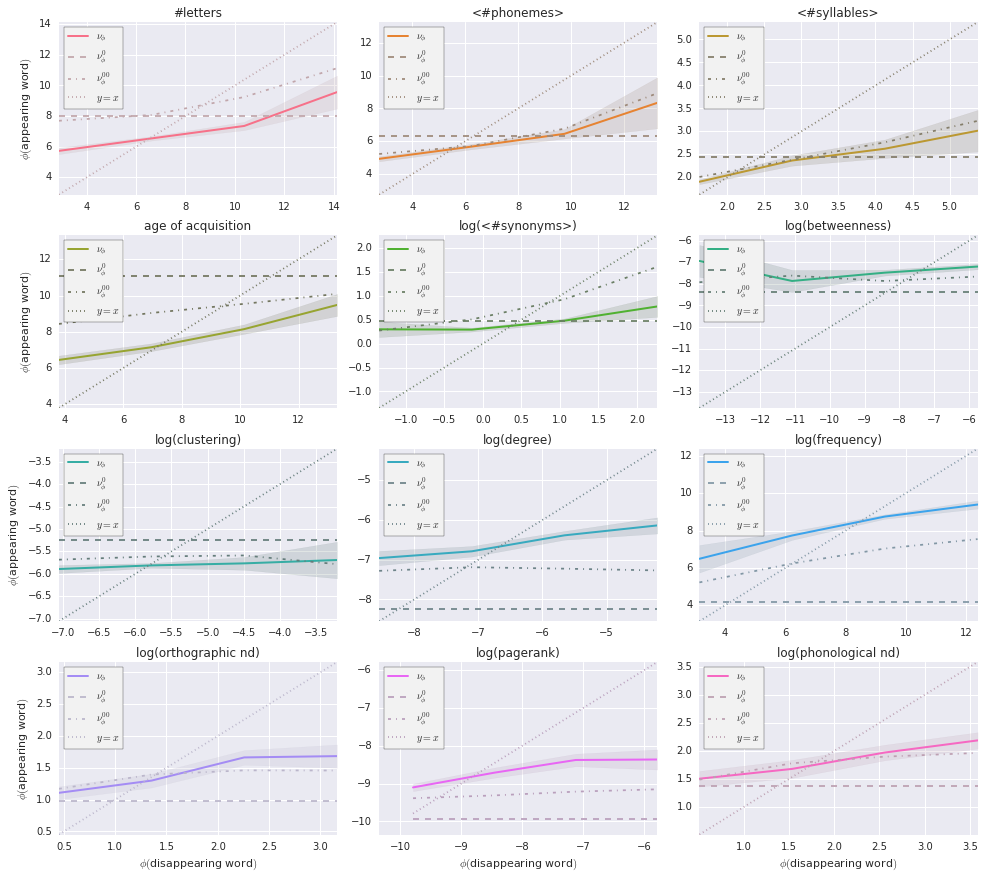

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

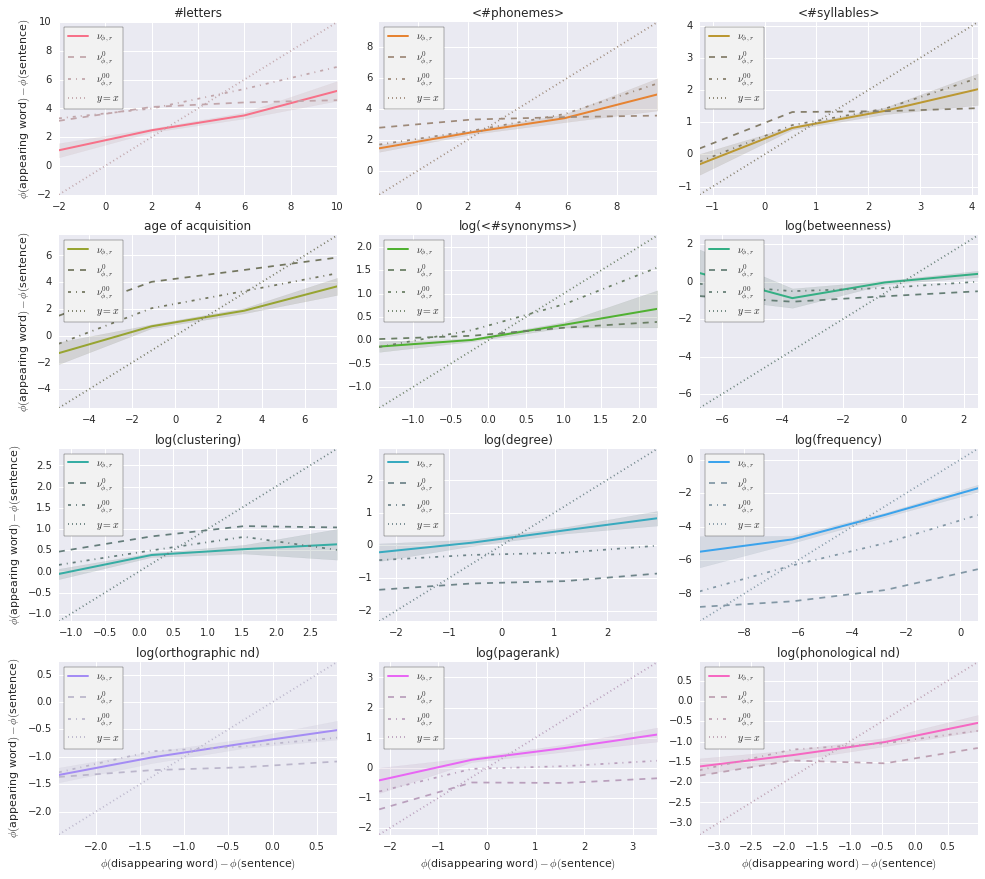

In [8]:
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

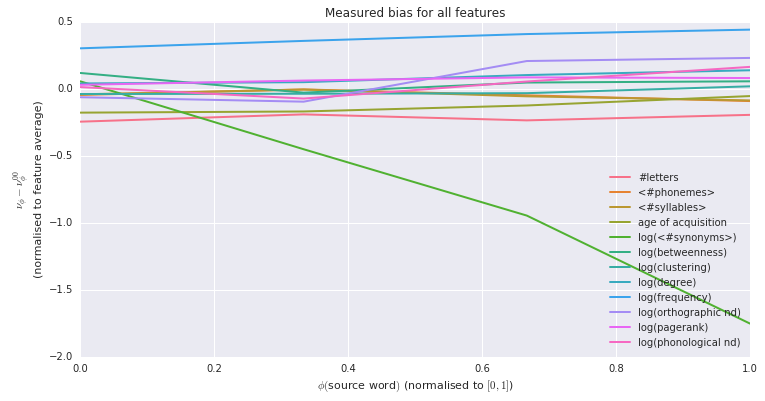

In [9]:
palette = sb.color_palette('husl', len(Substitution.__features__))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

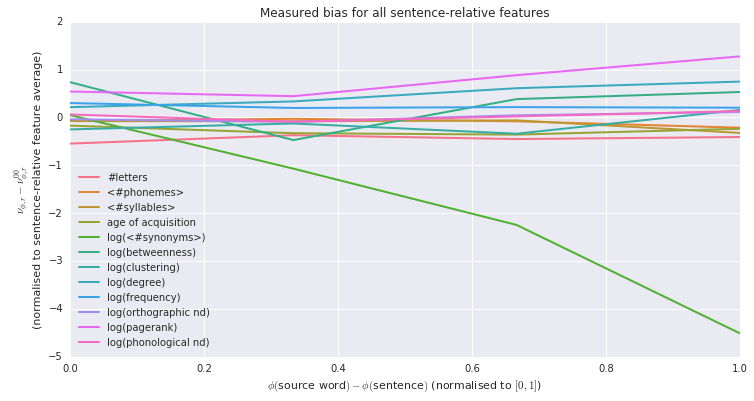

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False, relative=True)
ax.legend(loc='lower left')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

### 2.3 Feature variations, reduced to features we expose in the paper

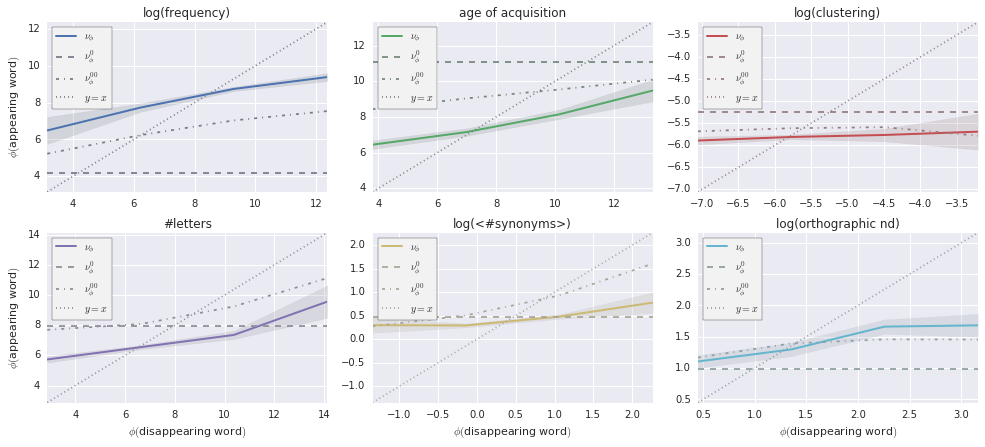

In [11]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

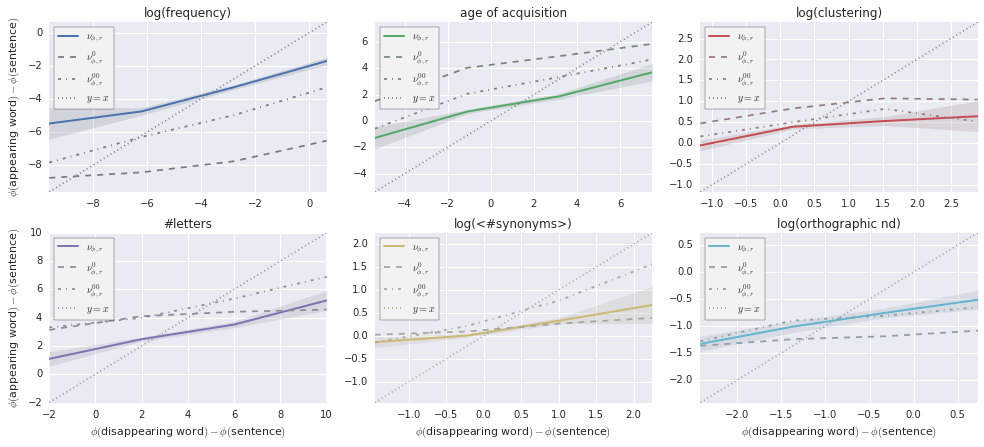

In [12]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Now $\nu_{\phi} - \nu_{\phi}^{00}$

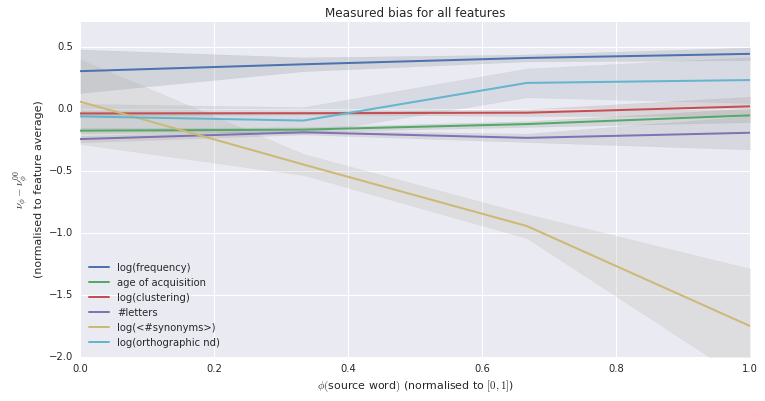

In [13]:
palette = sb.color_palette('deep', len(PAPER_FEATURES))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j])
ax.legend(loc='lower left')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

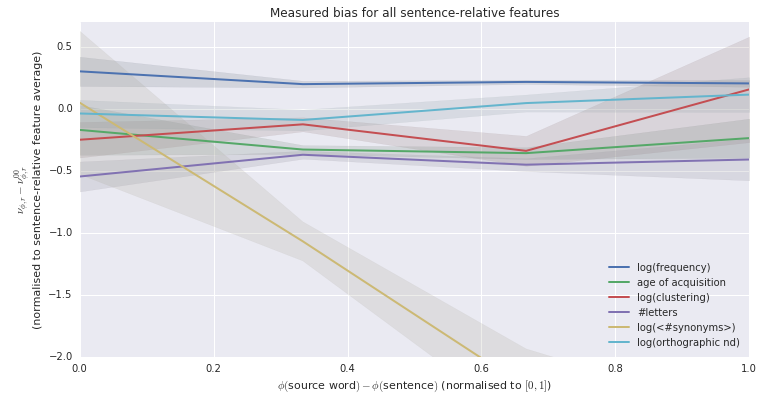

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], relative=True)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [15]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count, right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count, right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (dest[(x_bins == x) & (y_bins == y)] -
                              source[(x_bins == x) & (y_bins == y)]).mean()
            v_values[y, x] = (dest_rel[(x_bins == x) & (y_bins == y)] -
                              source_rel[(x_bins == x) & (y_bins == y)]).mean()
            strength[y, x] = np.sqrt((dest[(x_bins == x) & (y_bins == y)] - 
                                      source[(x_bins == x) & (y_bins == y)]) ** 2 +
                                     (dest_rel[(x_bins == x) & (y_bins == y)] - 
                                      source_rel[(x_bins == x) & (y_bins == y)]) ** 2).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


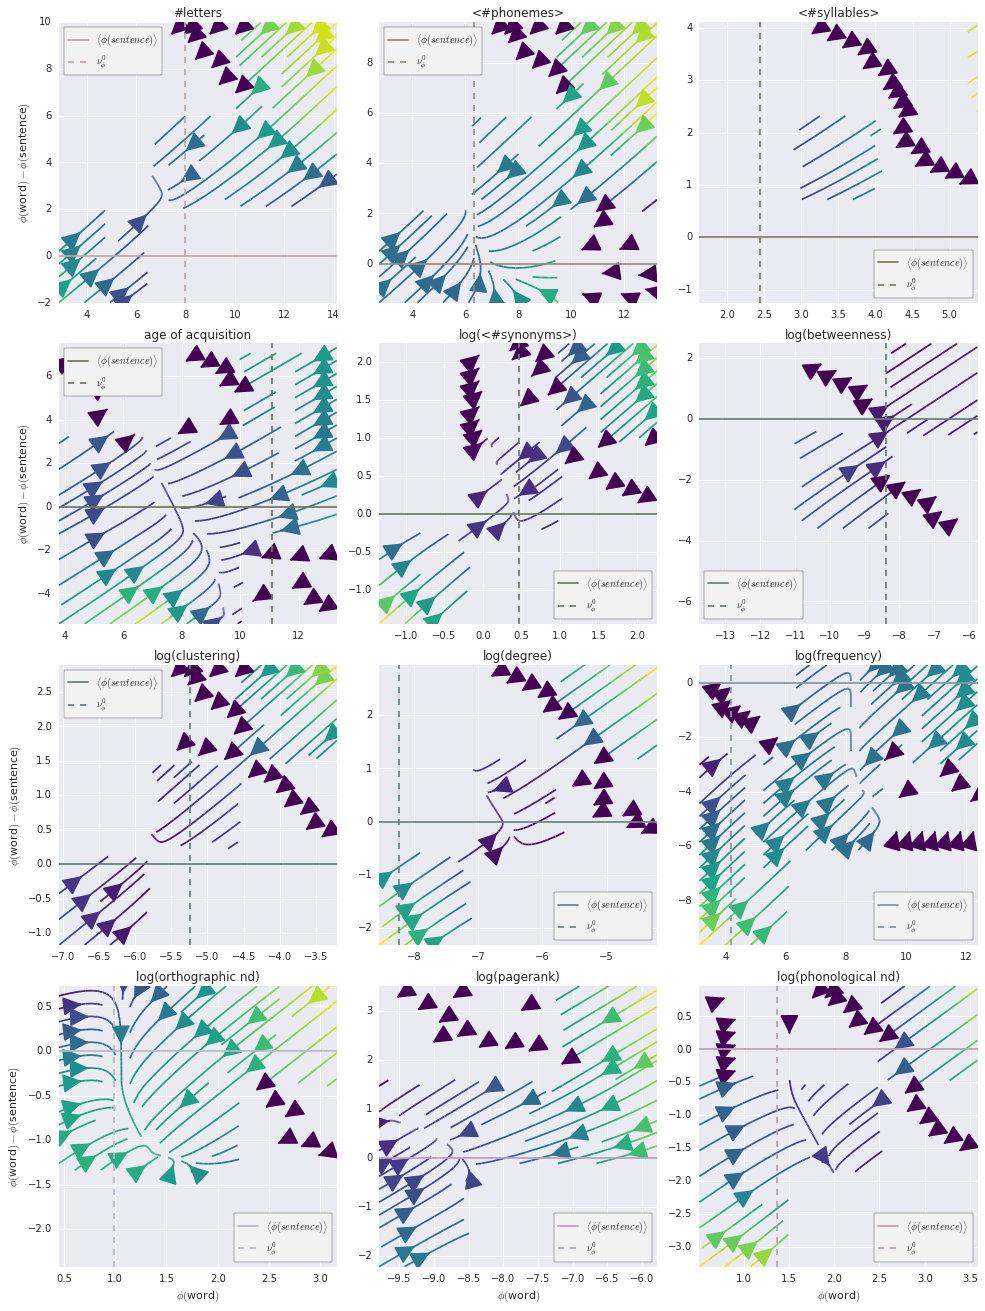

In [16]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


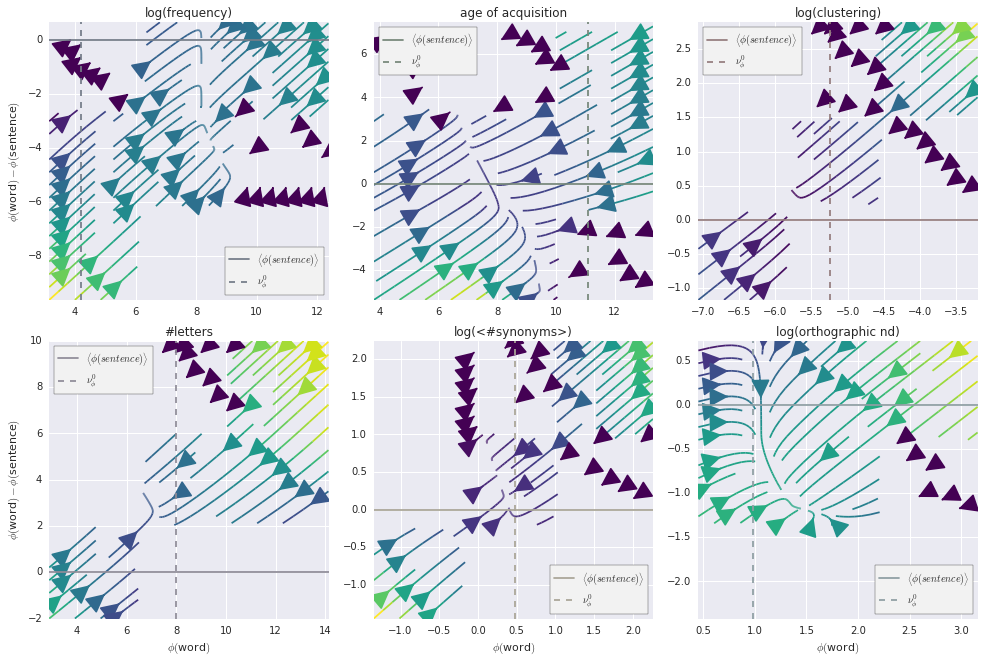

In [17]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account.

### 4.1 On all the features

Compute the actual PCA

In [18]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 10 components.

Those explain the following variance:
[ 0.53268855  0.17164239  0.08065655  0.07445233  0.03388812  0.0306174
  0.01933845  0.0182732   0.01671228  0.00924931]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographic_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,-0.443228,0.280361,-0.086708,0.241134,0.233212,-0.447906,0.212414,0.279448,-0.422861,0.276404,-0.160635,0.007022
Component-1,-0.328282,0.391994,-0.136364,0.293726,0.277619,0.430831,-0.166801,0.311518,0.415745,-0.212406,0.167852,0.003675
Component-2,0.804980,0.416665,-0.154053,0.151662,0.310576,-0.097815,0.003810,0.099144,-0.037943,0.104876,-0.004112,-0.057788


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [19]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 24971) |          | Elapsed Time: 0:00:41 ETA:  11 days, 21:28:05

  0% (  102 of 24971) |                    | Elapsed Time: 0:00:42 ETA:  0:03:26

  0% (  230 of 24971) |                    | Elapsed Time: 0:00:43 ETA:  0:02:55

  1% (  313 of 24971) |                    | Elapsed Time: 0:00:43 ETA:  0:02:49

  1% (  440 of 24971) |                    | Elapsed Time: 0:00:44 ETA:  0:02:44

  2% (  564 of 24971) |                    | Elapsed Time: 0:00:45 ETA:  0:02:41

  2% (  625 of 24971) |                    | Elapsed Time: 0:00:46 ETA:  0:02:38

  3% (  750 of 24971) |                    | Elapsed Time: 0:00:47 ETA:  0:02:36

  3% (  886 of 24971) |                    | Elapsed Time: 0:00:48 ETA:  0:02:32

  3% (  937 of 24971) |                    | Elapsed Time: 0:00:48 ETA:  0:02:31

  4% ( 1051 of 24971) |                    | Elapsed Time: 0:00:49 ETA:  0:02:27

  4% ( 1165 of 24971) |                    | Elapsed Time: 0:00:50 ETA:  0:02:29

  5% ( 1249 of 24971) |#                   | Elapsed Time: 0:00:51 ETA:  0:02:26

  5% ( 1349 of 24971) |#                   | Elapsed Time: 0:00:52 ETA:  0:02:31

  5% ( 1435 of 24971) |#                   | Elapsed Time: 0:00:53 ETA:  0:02:39

  6% ( 1522 of 24971) |#                   | Elapsed Time: 0:00:54 ETA:  0:02:48

  6% ( 1561 of 24971) |#                   | Elapsed Time: 0:00:54 ETA:  0:02:54

  6% ( 1665 of 24971) |#                   | Elapsed Time: 0:00:55 ETA:  0:03:03

  7% ( 1770 of 24971) |#                   | Elapsed Time: 0:00:56 ETA:  0:03:05

  7% ( 1873 of 24971) |#                   | Elapsed Time: 0:00:57 ETA:  0:03:01

  8% ( 2007 of 24971) |#                   | Elapsed Time: 0:00:58 ETA:  0:02:55

  8% ( 2138 of 24971) |#                   | Elapsed Time: 0:00:59 ETA:  0:02:53

  8% ( 2185 of 24971) |#                   | Elapsed Time: 0:00:59 ETA:  0:02:49

  9% ( 2277 of 24971) |#                   | Elapsed Time: 0:01:00 ETA:  0:02:46

  9% ( 2374 of 24971) |#                   | Elapsed Time: 0:01:01 ETA:  0:02:42

 10% ( 2498 of 24971) |##                  | Elapsed Time: 0:01:02 ETA:  0:02:32

 10% ( 2598 of 24971) |##                  | Elapsed Time: 0:01:03 ETA:  0:02:32

 10% ( 2715 of 24971) |##                  | Elapsed Time: 0:01:04 ETA:  0:02:28

 11% ( 2810 of 24971) |##                  | Elapsed Time: 0:01:05 ETA:  0:02:27

 11% ( 2934 of 24971) |##                  | Elapsed Time: 0:01:06 ETA:  0:02:28

 12% ( 3025 of 24971) |##                  | Elapsed Time: 0:01:07 ETA:  0:02:37

 12% ( 3122 of 24971) |##                  | Elapsed Time: 0:01:08 ETA:  0:02:40

 12% ( 3236 of 24971) |##                  | Elapsed Time: 0:01:09 ETA:  0:02:34

 13% ( 3360 of 24971) |##                  | Elapsed Time: 0:01:10 ETA:  0:02:37

 13% ( 3434 of 24971) |##                  | Elapsed Time: 0:01:11 ETA:  0:02:31

 14% ( 3546 of 24971) |##                  | Elapsed Time: 0:01:12 ETA:  0:02:31

 14% ( 3672 of 24971) |##                  | Elapsed Time: 0:01:13 ETA:  0:02:31

 15% ( 3746 of 24971) |###                 | Elapsed Time: 0:01:14 ETA:  0:02:36

 15% ( 3878 of 24971) |###                 | Elapsed Time: 0:01:15 ETA:  0:02:23

 15% ( 3989 of 24971) |###                 | Elapsed Time: 0:01:16 ETA:  0:02:15

 16% ( 4058 of 24971) |###                 | Elapsed Time: 0:01:16 ETA:  0:02:15

 16% ( 4188 of 24971) |###                 | Elapsed Time: 0:01:17 ETA:  0:02:10

 17% ( 4308 of 24971) |###                 | Elapsed Time: 0:01:18 ETA:  0:02:10

 17% ( 4370 of 24971) |###                 | Elapsed Time: 0:01:19 ETA:  0:02:11

 17% ( 4483 of 24971) |###                 | Elapsed Time: 0:01:20 ETA:  0:02:10

 18% ( 4568 of 24971) |###                 | Elapsed Time: 0:01:21 ETA:  0:02:19

 18% ( 4683 of 24971) |###                 | Elapsed Time: 0:01:22 ETA:  0:02:11

 19% ( 4834 of 24971) |###                 | Elapsed Time: 0:01:23 ETA:  0:02:06

 19% ( 4942 of 24971) |###                 | Elapsed Time: 0:01:24 ETA:  0:02:05

 20% ( 4995 of 24971) |####                | Elapsed Time: 0:01:24 ETA:  0:02:12

 20% ( 5070 of 24971) |####                | Elapsed Time: 0:01:25 ETA:  0:02:25

 20% ( 5144 of 24971) |####                | Elapsed Time: 0:01:26 ETA:  0:02:36

 20% ( 5218 of 24971) |####                | Elapsed Time: 0:01:27 ETA:  0:02:45

 21% ( 5307 of 24971) |####                | Elapsed Time: 0:01:28 ETA:  0:02:47

 21% ( 5415 of 24971) |####                | Elapsed Time: 0:01:29 ETA:  0:02:39

 22% ( 5526 of 24971) |####                | Elapsed Time: 0:01:30 ETA:  0:02:44

 22% ( 5619 of 24971) |####                | Elapsed Time: 0:01:31 ETA:  0:02:56

 22% ( 5738 of 24971) |####                | Elapsed Time: 0:01:32 ETA:  0:02:51

 23% ( 5838 of 24971) |####                | Elapsed Time: 0:01:33 ETA:  0:02:44

 23% ( 5931 of 24971) |####                | Elapsed Time: 0:01:34 ETA:  0:02:36

 24% ( 6051 of 24971) |####                | Elapsed Time: 0:01:35 ETA:  0:02:22

 24% ( 6170 of 24971) |####                | Elapsed Time: 0:01:36 ETA:  0:02:10

 25% ( 6243 of 24971) |#####               | Elapsed Time: 0:01:37 ETA:  0:02:07

 25% ( 6370 of 24971) |#####               | Elapsed Time: 0:01:38 ETA:  0:02:02

 25% ( 6492 of 24971) |#####               | Elapsed Time: 0:01:39 ETA:  0:01:58

 26% ( 6555 of 24971) |#####               | Elapsed Time: 0:01:39 ETA:  0:01:57

 26% ( 6676 of 24971) |#####               | Elapsed Time: 0:01:40 ETA:  0:01:56

 27% ( 6813 of 24971) |#####               | Elapsed Time: 0:01:41 ETA:  0:01:46

 27% ( 6868 of 24971) |#####               | Elapsed Time: 0:01:42 ETA:  0:01:40

 27% ( 6987 of 24971) |#####               | Elapsed Time: 0:01:43 ETA:  0:01:40

 28% ( 7060 of 24971) |#####               | Elapsed Time: 0:01:44 ETA:  0:01:49

 28% ( 7149 of 24971) |#####               | Elapsed Time: 0:01:45 ETA:  0:01:55

 28% ( 7180 of 24971) |#####               | Elapsed Time: 0:01:45 ETA:  0:01:59

 29% ( 7302 of 24971) |#####               | Elapsed Time: 0:01:46 ETA:  0:01:58

 29% ( 7408 of 24971) |#####               | Elapsed Time: 0:01:47 ETA:  0:02:00

 30% ( 7492 of 24971) |######              | Elapsed Time: 0:01:48 ETA:  0:02:02

 30% ( 7622 of 24971) |######              | Elapsed Time: 0:01:49 ETA:  0:02:03

 31% ( 7750 of 24971) |######              | Elapsed Time: 0:01:50 ETA:  0:01:58

 31% ( 7804 of 24971) |######              | Elapsed Time: 0:01:50 ETA:  0:02:01

 31% ( 7869 of 24971) |######              | Elapsed Time: 0:01:51 ETA:  0:02:02

 31% ( 7972 of 24971) |######              | Elapsed Time: 0:01:52 ETA:  0:01:57

 32% ( 8078 of 24971) |######              | Elapsed Time: 0:01:53 ETA:  0:01:57

 32% ( 8116 of 24971) |######              | Elapsed Time: 0:01:53 ETA:  0:01:59

 33% ( 8247 of 24971) |######              | Elapsed Time: 0:01:54 ETA:  0:01:51

 33% ( 8366 of 24971) |######              | Elapsed Time: 0:01:55 ETA:  0:01:48

 33% ( 8428 of 24971) |######              | Elapsed Time: 0:01:56 ETA:  0:01:52

 34% ( 8515 of 24971) |######              | Elapsed Time: 0:01:57 ETA:  0:02:04

 34% ( 8613 of 24971) |######              | Elapsed Time: 0:01:58 ETA:  0:02:05

 34% ( 8717 of 24971) |######              | Elapsed Time: 0:01:59 ETA:  0:01:52

 35% ( 8740 of 24971) |#######             | Elapsed Time: 0:01:59 ETA:  0:01:53

 35% ( 8864 of 24971) |#######             | Elapsed Time: 0:02:00 ETA:  0:01:46

 35% ( 8987 of 24971) |#######             | Elapsed Time: 0:02:01 ETA:  0:01:43

 36% ( 9052 of 24971) |#######             | Elapsed Time: 0:02:02 ETA:  0:01:47

 36% ( 9160 of 24971) |#######             | Elapsed Time: 0:02:03 ETA:  0:01:49

 37% ( 9278 of 24971) |#######             | Elapsed Time: 0:02:04 ETA:  0:01:46

 37% ( 9365 of 24971) |#######             | Elapsed Time: 0:02:05 ETA:  0:01:38

 37% ( 9475 of 24971) |#######             | Elapsed Time: 0:02:06 ETA:  0:01:34

 38% ( 9589 of 24971) |#######             | Elapsed Time: 0:02:07 ETA:  0:01:31

 38% ( 9677 of 24971) |#######             | Elapsed Time: 0:02:07 ETA:  0:01:28

 39% ( 9778 of 24971) |#######             | Elapsed Time: 0:02:08 ETA:  0:01:33

 39% ( 9911 of 24971) |#######             | Elapsed Time: 0:02:09 ETA:  0:01:29

 40% ( 9989 of 24971) |########            | Elapsed Time: 0:02:10 ETA:  0:01:29

 40% (10108 of 24971) |########            | Elapsed Time: 0:02:11 ETA:  0:01:25

 40% (10227 of 24971) |########            | Elapsed Time: 0:02:12 ETA:  0:01:24

 41% (10301 of 24971) |########            | Elapsed Time: 0:02:13 ETA:  0:01:21

 41% (10425 of 24971) |########            | Elapsed Time: 0:02:14 ETA:  0:01:17

 42% (10535 of 24971) |########            | Elapsed Time: 0:02:15 ETA:  0:01:17

 42% (10613 of 24971) |########            | Elapsed Time: 0:02:15 ETA:  0:01:13

 42% (10730 of 24971) |########            | Elapsed Time: 0:02:16 ETA:  0:01:08

 43% (10839 of 24971) |########            | Elapsed Time: 0:02:17 ETA:  0:01:12

 43% (10925 of 24971) |########            | Elapsed Time: 0:02:18 ETA:  0:01:16

 44% (11037 of 24971) |########            | Elapsed Time: 0:02:19 ETA:  0:01:17

 44% (11149 of 24971) |########            | Elapsed Time: 0:02:20 ETA:  0:01:17

 45% (11237 of 24971) |#########           | Elapsed Time: 0:02:21 ETA:  0:01:16

 45% (11347 of 24971) |#########           | Elapsed Time: 0:02:22 ETA:  0:01:18

 45% (11459 of 24971) |#########           | Elapsed Time: 0:02:23 ETA:  0:01:17

 46% (11550 of 24971) |#########           | Elapsed Time: 0:02:24 ETA:  0:01:18

 46% (11644 of 24971) |#########           | Elapsed Time: 0:02:25 ETA:  0:01:23

 46% (11735 of 24971) |#########           | Elapsed Time: 0:02:26 ETA:  0:01:26

 47% (11862 of 24971) |#########           | Elapsed Time: 0:02:27 ETA:  0:01:19

 47% (11962 of 24971) |#########           | Elapsed Time: 0:02:28 ETA:  0:01:22

 48% (12078 of 24971) |#########           | Elapsed Time: 0:02:29 ETA:  0:01:23

 48% (12174 of 24971) |#########           | Elapsed Time: 0:02:29 ETA:  0:01:18

 49% (12309 of 24971) |#########           | Elapsed Time: 0:02:30 ETA:  0:01:11

 49% (12412 of 24971) |#########           | Elapsed Time: 0:02:31 ETA:  0:01:14

 50% (12486 of 24971) |##########          | Elapsed Time: 0:02:32 ETA:  0:01:08

 50% (12618 of 24971) |##########          | Elapsed Time: 0:02:33 ETA:  0:00:57

 51% (12762 of 24971) |##########          | Elapsed Time: 0:02:34 ETA:  0:00:51

 51% (12798 of 24971) |##########          | Elapsed Time: 0:02:34 ETA:  0:00:50

 51% (12919 of 24971) |##########          | Elapsed Time: 0:02:35 ETA:  0:00:45

 52% (13009 of 24971) |##########          | Elapsed Time: 0:02:36 ETA:  0:00:49

 52% (13110 of 24971) |##########          | Elapsed Time: 0:02:37 ETA:  0:00:49

 52% (13227 of 24971) |##########          | Elapsed Time: 0:02:38 ETA:  0:00:52

 53% (13347 of 24971) |##########          | Elapsed Time: 0:02:39 ETA:  0:00:48

 53% (13422 of 24971) |##########          | Elapsed Time: 0:02:40 ETA:  0:00:43

 54% (13551 of 24971) |##########          | Elapsed Time: 0:02:41 ETA:  0:00:43

 54% (13666 of 24971) |##########          | Elapsed Time: 0:02:42 ETA:  0:00:48

 55% (13735 of 24971) |###########         | Elapsed Time: 0:02:42 ETA:  0:00:48

 55% (13806 of 24971) |###########         | Elapsed Time: 0:02:43 ETA:  0:00:59

 55% (13916 of 24971) |###########         | Elapsed Time: 0:02:44 ETA:  0:00:54

 56% (14047 of 24971) |###########         | Elapsed Time: 0:02:45 ETA:  0:00:54

 56% (14161 of 24971) |###########         | Elapsed Time: 0:02:46 ETA:  0:00:54

 57% (14275 of 24971) |###########         | Elapsed Time: 0:02:47 ETA:  0:00:57

 57% (14359 of 24971) |###########         | Elapsed Time: 0:02:48 ETA:  0:01:06

 58% (14507 of 24971) |###########         | Elapsed Time: 0:02:49 ETA:  0:00:56

 58% (14633 of 24971) |###########         | Elapsed Time: 0:02:50 ETA:  0:00:53

 58% (14671 of 24971) |###########         | Elapsed Time: 0:02:51 ETA:  0:00:42

 59% (14772 of 24971) |###########         | Elapsed Time: 0:02:52 ETA:  0:00:43

 59% (14879 of 24971) |###########         | Elapsed Time: 0:02:53 ETA:  0:00:45

 59% (14957 of 24971) |###########         | Elapsed Time: 0:02:54 ETA:  0:00:53

 60% (14983 of 24971) |############        | Elapsed Time: 0:02:54 ETA:  0:00:54

 60% (15043 of 24971) |############        | Elapsed Time: 0:02:55 ETA:  0:01:09

 60% (15174 of 24971) |############        | Elapsed Time: 0:02:56 ETA:  0:00:57

 61% (15295 of 24971) |############        | Elapsed Time: 0:02:57 ETA:  0:01:04

 61% (15430 of 24971) |############        | Elapsed Time: 0:02:58 ETA:  0:01:00

 62% (15546 of 24971) |############        | Elapsed Time: 0:02:59 ETA:  0:00:56

 62% (15607 of 24971) |############        | Elapsed Time: 0:02:59 ETA:  0:00:49

 62% (15721 of 24971) |############        | Elapsed Time: 0:03:00 ETA:  0:00:46

 63% (15830 of 24971) |############        | Elapsed Time: 0:03:01 ETA:  0:00:37

 63% (15920 of 24971) |############        | Elapsed Time: 0:03:02 ETA:  0:00:35

 64% (16066 of 24971) |############        | Elapsed Time: 0:03:03 ETA:  0:00:16

 64% (16184 of 24971) |############        | Elapsed Time: 0:03:04 ETA:  0:00:17

 65% (16232 of 24971) |#############       | Elapsed Time: 0:03:05 ETA:  0:00:19

 65% (16353 of 24971) |#############       | Elapsed Time: 0:03:06 ETA:  0:00:21

 65% (16454 of 24971) |#############       | Elapsed Time: 0:03:07 ETA:  0:00:24

 66% (16544 of 24971) |#############       | Elapsed Time: 0:03:07 ETA:  0:00:24

 66% (16676 of 24971) |#############       | Elapsed Time: 0:03:08 ETA:  0:00:20

 67% (16797 of 24971) |#############       | Elapsed Time: 0:03:09 ETA:  0:00:16

 67% (16856 of 24971) |#############       | Elapsed Time: 0:03:10 ETA:  0:00:15

 67% (16980 of 24971) |#############       | Elapsed Time: 0:03:11 ETA:  0:00:19

 68% (17096 of 24971) |#############       | Elapsed Time: 0:03:12 ETA:  0:00:18

 68% (17168 of 24971) |#############       | Elapsed Time: 0:03:16 ETA:  0:02:05

 69% (17277 of 24971) |#############       | Elapsed Time: 0:03:17 ETA:  0:02:01

 69% (17374 of 24971) |#############       | Elapsed Time: 0:03:18 ETA:  0:02:06

 70% (17480 of 24971) |##############      | Elapsed Time: 0:03:19 ETA:  0:02:13

 70% (17595 of 24971) |##############      | Elapsed Time: 0:03:20 ETA:  0:02:15

 70% (17716 of 24971) |##############      | Elapsed Time: 0:03:21 ETA:  0:02:05

 71% (17792 of 24971) |##############      | Elapsed Time: 0:03:22 ETA:  0:02:10

 71% (17877 of 24971) |##############      | Elapsed Time: 0:03:23 ETA:  0:02:23

 72% (17989 of 24971) |##############      | Elapsed Time: 0:03:24 ETA:  0:00:25

 72% (18104 of 24971) |##############      | Elapsed Time: 0:03:25 ETA:  0:00:25

 73% (18231 of 24971) |##############      | Elapsed Time: 0:03:26 ETA:  0:00:16

 73% (18346 of 24971) |##############      | Elapsed Time: 0:03:27 ETA:  0:00:14

 73% (18417 of 24971) |##############      | Elapsed Time: 0:03:27 ETA:  0:00:13

 74% (18542 of 24971) |##############      | Elapsed Time: 0:03:28 ETA:  0:00:11

 74% (18610 of 24971) |##############      | Elapsed Time: 0:03:29 ETA:  0:00:25

 75% (18729 of 24971) |###############     | Elapsed Time: 0:03:31 ETA:  0:00:17

 75% (18843 of 24971) |###############     | Elapsed Time: 0:03:32 ETA:  0:00:14

 75% (18960 of 24971) |###############     | Elapsed Time: 0:03:33 ETA:  0:00:11

 76% (19041 of 24971) |###############     | Elapsed Time: 0:03:33 ETA:  0:00:13

 76% (19150 of 24971) |###############     | Elapsed Time: 0:03:34 ETA:  0:00:14

 77% (19233 of 24971) |###############     | Elapsed Time: 0:03:35 ETA:  0:00:22

 77% (19331 of 24971) |###############     | Elapsed Time: 0:03:36 ETA:  0:00:29

 77% (19353 of 24971) |###############     | Elapsed Time: 0:03:37 ETA:  0:00:20

 77% (19470 of 24971) |###############     | Elapsed Time: 0:03:38 ETA:  0:00:18

 78% (19582 of 24971) |###############     | Elapsed Time: 0:03:39 ETA:  0:00:15

 78% (19665 of 24971) |###############     | Elapsed Time: 0:03:39 ETA:  0:00:19

 79% (19785 of 24971) |###############     | Elapsed Time: 0:03:40 ETA:  0:00:17

 79% (19897 of 24971) |###############     | Elapsed Time: 0:03:41 ETA:  0:00:17

 80% (19977 of 24971) |################    | Elapsed Time: 0:03:42 ETA:  0:00:15

 80% (20105 of 24971) |################    | Elapsed Time: 0:03:43 ETA:  0:00:02

 80% (20223 of 24971) |################    | Elapsed Time: 0:03:44 ETA:  0:00:00

 81% (20289 of 24971) |################    | Elapsed Time: 0:03:45 ETA:  0:00:00

 81% (20400 of 24971) |################    | Elapsed Time: 0:03:46 ETA:  0:00:00

 82% (20525 of 24971) |################    | Elapsed Time: 0:03:47 ETA:  0:00:00

 82% (20602 of 24971) |################    | Elapsed Time: 0:03:47 ETA:  0:00:00

 82% (20719 of 24971) |################    | Elapsed Time: 0:03:48 ETA:  0:00:00

 83% (20836 of 24971) |################    | Elapsed Time: 0:03:49 ETA:  0:00:00

 83% (20914 of 24971) |################    | Elapsed Time: 0:03:50 ETA:  0:00:00

 84% (21031 of 24971) |################    | Elapsed Time: 0:03:51 ETA:  0:00:00

 84% (21157 of 24971) |################    | Elapsed Time: 0:03:52 ETA:  0:00:00

 85% (21226 of 24971) |#################   | Elapsed Time: 0:03:53 ETA:  0:00:00

 85% (21360 of 24971) |#################   | Elapsed Time: 0:03:54 ETA:  0:00:00

 86% (21486 of 24971) |#################   | Elapsed Time: 0:03:55 ETA:  0:00:00

 86% (21538 of 24971) |#################   | Elapsed Time: 0:03:55 ETA:  0:00:00

 86% (21655 of 24971) |#################   | Elapsed Time: 0:03:56 ETA:  0:00:00

 87% (21773 of 24971) |#################   | Elapsed Time: 0:03:57 ETA:  0:00:00

 87% (21850 of 24971) |#################   | Elapsed Time: 0:03:58 ETA:  0:00:00

 88% (21975 of 24971) |#################   | Elapsed Time: 0:03:59 ETA:  0:00:00

 88% (22074 of 24971) |#################   | Elapsed Time: 0:04:00 ETA:  0:00:00

 88% (22162 of 24971) |#################   | Elapsed Time: 0:04:01 ETA:  0:00:00

 89% (22280 of 24971) |#################   | Elapsed Time: 0:04:02 ETA:  0:00:00

 89% (22394 of 24971) |#################   | Elapsed Time: 0:04:03 ETA:  0:00:00

 90% (22474 of 24971) |##################  | Elapsed Time: 0:04:03 ETA:  0:00:00

 90% (22586 of 24971) |##################  | Elapsed Time: 0:04:04 ETA:  0:00:00

 90% (22711 of 24971) |##################  | Elapsed Time: 0:04:05 ETA:  0:00:00

 91% (22787 of 24971) |##################  | Elapsed Time: 0:04:06 ETA:  0:00:00

 91% (22887 of 24971) |##################  | Elapsed Time: 0:04:07 ETA:  0:00:00

 92% (22992 of 24971) |##################  | Elapsed Time: 0:04:08 ETA:  0:00:00

 92% (23099 of 24971) |##################  | Elapsed Time: 0:04:09 ETA:  0:00:00

 92% (23222 of 24971) |##################  | Elapsed Time: 0:04:10 ETA:  0:00:00

 93% (23356 of 24971) |##################  | Elapsed Time: 0:04:11 ETA:  0:00:00

 93% (23411 of 24971) |##################  | Elapsed Time: 0:04:11 ETA:  0:00:00

 94% (23525 of 24971) |##################  | Elapsed Time: 0:04:12 ETA:  0:00:00

 94% (23642 of 24971) |##################  | Elapsed Time: 0:04:13 ETA:  0:00:00

 95% (23723 of 24971) |################### | Elapsed Time: 0:04:14 ETA:  0:00:00

 95% (23836 of 24971) |################### | Elapsed Time: 0:04:15 ETA:  0:00:00

 95% (23935 of 24971) |################### | Elapsed Time: 0:04:16 ETA:  0:00:00

 96% (24035 of 24971) |################### | Elapsed Time: 0:04:17 ETA:  0:00:00

 96% (24163 of 24971) |################### | Elapsed Time: 0:04:18 ETA:  0:00:00

 97% (24277 of 24971) |################### | Elapsed Time: 0:04:19 ETA:  0:00:00

 97% (24347 of 24971) |################### | Elapsed Time: 0:04:20 ETA:  0:00:00

 97% (24466 of 24971) |################### | Elapsed Time: 0:04:21 ETA:  0:00:00

 98% (24577 of 24971) |################### | Elapsed Time: 0:04:22 ETA:  0:00:00

 98% (24659 of 24971) |################### | Elapsed Time: 0:04:22 ETA:  0:00:00

 99% (24782 of 24971) |################### | Elapsed Time: 0:04:23 ETA:  0:00:00

 99% (24907 of 24971) |################### | Elapsed Time: 0:04:24 ETA:  0:00:00

100% (24971 of 24971) |####################| Elapsed Time: 0:04:25 Time: 0:04:25


Compute cluster averages (so as not to overestimate confidence intervals).

In [20]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)

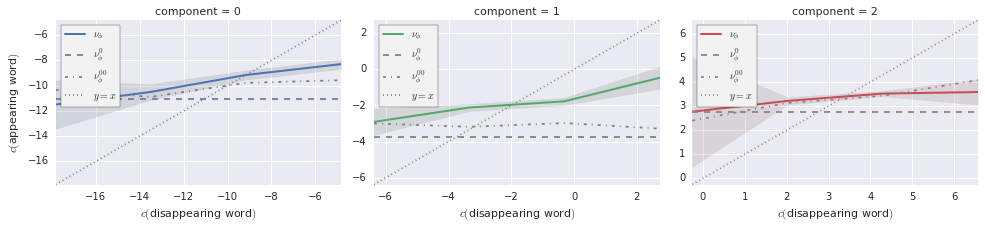

In [21]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On the features we expose in the paper

Compute the actual PCA

In [22]:
# Compute the PCA.
pcafeatures = tuple(sorted(PAPER_FEATURES))
pcavariations = variations[variations['feature'].map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 3 components.

Those explain the following variance:
[ 0.56223709  0.18725853  0.14180297]

We're plotting variation for the first 3 components:


,aoa,clustering,frequency,letters_count,orthographic_density,synonyms_count
Component-0,-0.675947,-0.106964,0.351873,-0.575849,0.275855,0.011889
Component-1,-0.452483,-0.112400,0.461546,0.701922,-0.276640,0.019405
Component-2,0.573751,-0.126262,0.789893,-0.166779,0.003627,-0.055760


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [23]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 24971) |           | Elapsed Time: 0:00:12 ETA:  3 days, 12:21:12

  0% (  115 of 24971) |                    | Elapsed Time: 0:00:13 ETA:  0:03:27

  0% (  247 of 24971) |                    | Elapsed Time: 0:00:14 ETA:  0:03:09

  1% (  313 of 24971) |                    | Elapsed Time: 0:00:14 ETA:  0:03:05

  1% (  449 of 24971) |                    | Elapsed Time: 0:00:15 ETA:  0:02:59

  2% (  581 of 24971) |                    | Elapsed Time: 0:00:16 ETA:  0:02:57

  2% (  625 of 24971) |                    | Elapsed Time: 0:00:16 ETA:  0:02:54

  3% (  765 of 24971) |                    | Elapsed Time: 0:00:17 ETA:  0:02:51

  3% (  937 of 24971) |                    | Elapsed Time: 0:00:19 ETA:  0:02:46

  4% ( 1063 of 24971) |                    | Elapsed Time: 0:00:20 ETA:  0:02:43

  4% ( 1200 of 24971) |                    | Elapsed Time: 0:00:21 ETA:  0:02:41

  5% ( 1249 of 24971) |#                   | Elapsed Time: 0:00:21 ETA:  0:02:39

  5% ( 1359 of 24971) |#                   | Elapsed Time: 0:00:22 ETA:  0:02:44

  5% ( 1459 of 24971) |#                   | Elapsed Time: 0:00:23 ETA:  0:02:49

  6% ( 1561 of 24971) |#                   | Elapsed Time: 0:00:24 ETA:  0:03:00

  6% ( 1678 of 24971) |#                   | Elapsed Time: 0:00:25 ETA:  0:03:08

  7% ( 1806 of 24971) |#                   | Elapsed Time: 0:00:26 ETA:  0:03:05

  7% ( 1873 of 24971) |#                   | Elapsed Time: 0:00:27 ETA:  0:03:05

  8% ( 2020 of 24971) |#                   | Elapsed Time: 0:00:28 ETA:  0:03:02

  8% ( 2185 of 24971) |#                   | Elapsed Time: 0:00:29 ETA:  0:02:53

  9% ( 2291 of 24971) |#                   | Elapsed Time: 0:00:30 ETA:  0:02:51

  9% ( 2414 of 24971) |#                   | Elapsed Time: 0:00:31 ETA:  0:02:44

 10% ( 2498 of 24971) |##                  | Elapsed Time: 0:00:31 ETA:  0:02:41

 10% ( 2614 of 24971) |##                  | Elapsed Time: 0:00:32 ETA:  0:02:40

 11% ( 2753 of 24971) |##                  | Elapsed Time: 0:00:33 ETA:  0:02:37

 11% ( 2810 of 24971) |##                  | Elapsed Time: 0:00:34 ETA:  0:02:35

 11% ( 2953 of 24971) |##                  | Elapsed Time: 0:00:35 ETA:  0:02:34

 12% ( 3052 of 24971) |##                  | Elapsed Time: 0:00:36 ETA:  0:02:43

 12% ( 3122 of 24971) |##                  | Elapsed Time: 0:00:36 ETA:  0:02:46

 13% ( 3254 of 24971) |##                  | Elapsed Time: 0:00:37 ETA:  0:02:40

 13% ( 3382 of 24971) |##                  | Elapsed Time: 0:00:38 ETA:  0:02:38

 13% ( 3434 of 24971) |##                  | Elapsed Time: 0:00:39 ETA:  0:02:40

 14% ( 3550 of 24971) |##                  | Elapsed Time: 0:00:40 ETA:  0:02:39

 14% ( 3685 of 24971) |##                  | Elapsed Time: 0:00:41 ETA:  0:02:39

 15% ( 3746 of 24971) |###                 | Elapsed Time: 0:00:41 ETA:  0:02:42

 15% ( 3890 of 24971) |###                 | Elapsed Time: 0:00:42 ETA:  0:02:41

 16% ( 4020 of 24971) |###                 | Elapsed Time: 0:00:43 ETA:  0:02:33

 16% ( 4058 of 24971) |###                 | Elapsed Time: 0:00:44 ETA:  0:02:29

 16% ( 4203 of 24971) |###                 | Elapsed Time: 0:00:45 ETA:  0:02:25

 17% ( 4335 of 24971) |###                 | Elapsed Time: 0:00:46 ETA:  0:02:23

 17% ( 4370 of 24971) |###                 | Elapsed Time: 0:00:46 ETA:  0:02:23

 17% ( 4492 of 24971) |###                 | Elapsed Time: 0:00:47 ETA:  0:02:21

 18% ( 4604 of 24971) |###                 | Elapsed Time: 0:00:48 ETA:  0:02:24

 18% ( 4683 of 24971) |###                 | Elapsed Time: 0:00:48 ETA:  0:02:20

 19% ( 4829 of 24971) |###                 | Elapsed Time: 0:00:49 ETA:  0:02:19

 19% ( 4932 of 24971) |###                 | Elapsed Time: 0:00:50 ETA:  0:02:23

 20% ( 4995 of 24971) |####                | Elapsed Time: 0:00:51 ETA:  0:02:28

 20% ( 5090 of 24971) |####                | Elapsed Time: 0:00:52 ETA:  0:02:39

 20% ( 5184 of 24971) |####                | Elapsed Time: 0:00:53 ETA:  0:02:47

 21% ( 5307 of 24971) |####                | Elapsed Time: 0:00:54 ETA:  0:02:50

 21% ( 5432 of 24971) |####                | Elapsed Time: 0:00:55 ETA:  0:02:46

 22% ( 5551 of 24971) |####                | Elapsed Time: 0:00:56 ETA:  0:02:48

 22% ( 5619 of 24971) |####                | Elapsed Time: 0:00:57 ETA:  0:02:53

 23% ( 5748 of 24971) |####                | Elapsed Time: 0:00:58 ETA:  0:02:45

 23% ( 5852 of 24971) |####                | Elapsed Time: 0:00:59 ETA:  0:02:43

 23% ( 5931 of 24971) |####                | Elapsed Time: 0:00:59 ETA:  0:02:37

 24% ( 6061 of 24971) |####                | Elapsed Time: 0:01:00 ETA:  0:02:27

 24% ( 6197 of 24971) |####                | Elapsed Time: 0:01:01 ETA:  0:02:20

 25% ( 6243 of 24971) |#####               | Elapsed Time: 0:01:02 ETA:  0:02:21

 25% ( 6353 of 24971) |#####               | Elapsed Time: 0:01:03 ETA:  0:02:24

 25% ( 6490 of 24971) |#####               | Elapsed Time: 0:01:04 ETA:  0:02:19

 26% ( 6555 of 24971) |#####               | Elapsed Time: 0:01:04 ETA:  0:02:19

 26% ( 6695 of 24971) |#####               | Elapsed Time: 0:01:05 ETA:  0:02:16

 27% ( 6868 of 24971) |#####               | Elapsed Time: 0:01:07 ETA:  0:02:03

 28% ( 7007 of 24971) |#####               | Elapsed Time: 0:01:08 ETA:  0:02:00

 28% ( 7087 of 24971) |#####               | Elapsed Time: 0:01:09 ETA:  0:02:11

 28% ( 7180 of 24971) |#####               | Elapsed Time: 0:01:09 ETA:  0:02:09

 29% ( 7323 of 24971) |#####               | Elapsed Time: 0:01:10 ETA:  0:02:01

 29% ( 7448 of 24971) |#####               | Elapsed Time: 0:01:11 ETA:  0:02:02

 30% ( 7492 of 24971) |######              | Elapsed Time: 0:01:12 ETA:  0:02:02

 30% ( 7641 of 24971) |######              | Elapsed Time: 0:01:13 ETA:  0:02:00

 31% ( 7804 of 24971) |######              | Elapsed Time: 0:01:14 ETA:  0:01:59

 31% ( 7895 of 24971) |######              | Elapsed Time: 0:01:15 ETA:  0:02:08

 32% ( 8016 of 24971) |######              | Elapsed Time: 0:01:16 ETA:  0:01:58

 32% ( 8116 of 24971) |######              | Elapsed Time: 0:01:17 ETA:  0:01:55

 33% ( 8260 of 24971) |######              | Elapsed Time: 0:01:18 ETA:  0:01:54

 33% ( 8428 of 24971) |######              | Elapsed Time: 0:01:19 ETA:  0:01:49

 34% ( 8534 of 24971) |######              | Elapsed Time: 0:01:20 ETA:  0:01:57

 34% ( 8671 of 24971) |######              | Elapsed Time: 0:01:21 ETA:  0:01:58

 35% ( 8740 of 24971) |#######             | Elapsed Time: 0:01:21 ETA:  0:02:00

 35% ( 8881 of 24971) |#######             | Elapsed Time: 0:01:22 ETA:  0:01:49

 36% ( 9017 of 24971) |#######             | Elapsed Time: 0:01:23 ETA:  0:01:45

 36% ( 9052 of 24971) |#######             | Elapsed Time: 0:01:24 ETA:  0:01:46

 36% ( 9176 of 24971) |#######             | Elapsed Time: 0:01:25 ETA:  0:01:49

 37% ( 9311 of 24971) |#######             | Elapsed Time: 0:01:26 ETA:  0:01:50

 37% ( 9365 of 24971) |#######             | Elapsed Time: 0:01:26 ETA:  0:01:51

 38% ( 9499 of 24971) |#######             | Elapsed Time: 0:01:27 ETA:  0:01:45

 38% ( 9630 of 24971) |#######             | Elapsed Time: 0:01:28 ETA:  0:01:45

 38% ( 9677 of 24971) |#######             | Elapsed Time: 0:01:29 ETA:  0:01:43

 39% ( 9800 of 24971) |#######             | Elapsed Time: 0:01:30 ETA:  0:01:45

 39% ( 9946 of 24971) |#######             | Elapsed Time: 0:01:31 ETA:  0:01:42

 40% ( 9989 of 24971) |########            | Elapsed Time: 0:01:31 ETA:  0:01:41

 40% (10117 of 24971) |########            | Elapsed Time: 0:01:32 ETA:  0:01:39

 41% (10262 of 24971) |########            | Elapsed Time: 0:01:33 ETA:  0:01:36

 41% (10301 of 24971) |########            | Elapsed Time: 0:01:33 ETA:  0:01:33

 41% (10447 of 24971) |########            | Elapsed Time: 0:01:34 ETA:  0:01:29

 42% (10613 of 24971) |########            | Elapsed Time: 0:01:35 ETA:  0:01:24

 43% (10753 of 24971) |########            | Elapsed Time: 0:01:36 ETA:  0:01:20

 43% (10878 of 24971) |########            | Elapsed Time: 0:01:37 ETA:  0:01:23

 43% (10925 of 24971) |########            | Elapsed Time: 0:01:38 ETA:  0:01:25

 44% (11065 of 24971) |########            | Elapsed Time: 0:01:39 ETA:  0:01:22

 44% (11199 of 24971) |########            | Elapsed Time: 0:01:40 ETA:  0:01:23

 45% (11237 of 24971) |#########           | Elapsed Time: 0:01:40 ETA:  0:01:24

 45% (11368 of 24971) |#########           | Elapsed Time: 0:01:41 ETA:  0:01:26

 46% (11512 of 24971) |#########           | Elapsed Time: 0:01:42 ETA:  0:01:24

 46% (11550 of 24971) |#########           | Elapsed Time: 0:01:42 ETA:  0:01:23

 46% (11665 of 24971) |#########           | Elapsed Time: 0:01:43 ETA:  0:01:27

 47% (11798 of 24971) |#########           | Elapsed Time: 0:01:44 ETA:  0:01:24

 47% (11862 of 24971) |#########           | Elapsed Time: 0:01:45 ETA:  0:01:19

 48% (11988 of 24971) |#########           | Elapsed Time: 0:01:46 ETA:  0:01:20

 48% (12129 of 24971) |#########           | Elapsed Time: 0:01:47 ETA:  0:01:18

 48% (12174 of 24971) |#########           | Elapsed Time: 0:01:47 ETA:  0:01:17

 49% (12324 of 24971) |#########           | Elapsed Time: 0:01:48 ETA:  0:01:12

 49% (12450 of 24971) |#########           | Elapsed Time: 0:01:49 ETA:  0:01:15

 50% (12486 of 24971) |##########          | Elapsed Time: 0:01:49 ETA:  0:01:15

 50% (12643 of 24971) |##########          | Elapsed Time: 0:01:50 ETA:  0:01:06

 51% (12798 of 24971) |##########          | Elapsed Time: 0:01:51 ETA:  0:01:00

 51% (12925 of 24971) |##########          | Elapsed Time: 0:01:52 ETA:  0:01:03

 52% (13042 of 24971) |##########          | Elapsed Time: 0:01:53 ETA:  0:01:04

 52% (13110 of 24971) |##########          | Elapsed Time: 0:01:54 ETA:  0:01:03

 53% (13244 of 24971) |##########          | Elapsed Time: 0:01:55 ETA:  0:01:04

 53% (13422 of 24971) |##########          | Elapsed Time: 0:01:56 ETA:  0:01:00

 54% (13568 of 24971) |##########          | Elapsed Time: 0:01:57 ETA:  0:00:59

 55% (13735 of 24971) |###########         | Elapsed Time: 0:01:58 ETA:  0:01:04

 55% (13818 of 24971) |###########         | Elapsed Time: 0:01:59 ETA:  0:01:12

 55% (13952 of 24971) |###########         | Elapsed Time: 0:02:00 ETA:  0:01:08

 56% (14047 of 24971) |###########         | Elapsed Time: 0:02:01 ETA:  0:01:06

 56% (14182 of 24971) |###########         | Elapsed Time: 0:02:02 ETA:  0:01:05

 57% (14312 of 24971) |###########         | Elapsed Time: 0:02:03 ETA:  0:01:08

 57% (14359 of 24971) |###########         | Elapsed Time: 0:02:03 ETA:  0:01:10

 58% (14523 of 24971) |###########         | Elapsed Time: 0:02:04 ETA:  0:01:05

 58% (14671 of 24971) |###########         | Elapsed Time: 0:02:05 ETA:  0:01:04

 59% (14805 of 24971) |###########         | Elapsed Time: 0:02:06 ETA:  0:00:53

 59% (14937 of 24971) |###########         | Elapsed Time: 0:02:07 ETA:  0:00:53

 60% (14983 of 24971) |############        | Elapsed Time: 0:02:08 ETA:  0:00:52

 60% (15083 of 24971) |############        | Elapsed Time: 0:02:09 ETA:  0:00:58

 60% (15227 of 24971) |############        | Elapsed Time: 0:02:10 ETA:  0:00:54

 61% (15295 of 24971) |############        | Elapsed Time: 0:02:10 ETA:  0:00:51

 61% (15451 of 24971) |############        | Elapsed Time: 0:02:11 ETA:  0:00:52

 62% (15607 of 24971) |############        | Elapsed Time: 0:02:12 ETA:  0:00:50

 63% (15744 of 24971) |############        | Elapsed Time: 0:02:13 ETA:  0:00:48

 63% (15872 of 24971) |############        | Elapsed Time: 0:02:14 ETA:  0:00:48

 63% (15920 of 24971) |############        | Elapsed Time: 0:02:15 ETA:  0:00:49

 64% (16082 of 24971) |############        | Elapsed Time: 0:02:16 ETA:  0:00:36

 65% (16232 of 24971) |#############       | Elapsed Time: 0:02:17 ETA:  0:00:38

 65% (16374 of 24971) |#############       | Elapsed Time: 0:02:18 ETA:  0:00:40

 66% (16504 of 24971) |#############       | Elapsed Time: 0:02:19 ETA:  0:00:43

 66% (16544 of 24971) |#############       | Elapsed Time: 0:02:19 ETA:  0:00:41

 66% (16694 of 24971) |#############       | Elapsed Time: 0:02:20 ETA:  0:00:38

 67% (16822 of 24971) |#############       | Elapsed Time: 0:02:21 ETA:  0:00:37

 67% (16856 of 24971) |#############       | Elapsed Time: 0:02:21 ETA:  0:00:36

 68% (16983 of 24971) |#############       | Elapsed Time: 0:02:22 ETA:  0:00:41

 68% (17118 of 24971) |#############       | Elapsed Time: 0:02:23 ETA:  0:00:40

 68% (17168 of 24971) |#############       | Elapsed Time: 0:02:24 ETA:  0:00:39

 69% (17307 of 24971) |#############       | Elapsed Time: 0:02:25 ETA:  0:00:39

 69% (17435 of 24971) |#############       | Elapsed Time: 0:02:26 ETA:  0:00:38

 70% (17480 of 24971) |##############      | Elapsed Time: 0:02:26 ETA:  0:00:38

 70% (17616 of 24971) |##############      | Elapsed Time: 0:02:27 ETA:  0:00:40

 71% (17764 of 24971) |##############      | Elapsed Time: 0:02:28 ETA:  0:00:35

 71% (17792 of 24971) |##############      | Elapsed Time: 0:02:28 ETA:  0:00:36

 71% (17899 of 24971) |##############      | Elapsed Time: 0:02:29 ETA:  0:00:39

 72% (18031 of 24971) |##############      | Elapsed Time: 0:02:30 ETA:  0:00:38

 72% (18104 of 24971) |##############      | Elapsed Time: 0:02:31 ETA:  0:00:38

 73% (18246 of 24971) |##############      | Elapsed Time: 0:02:32 ETA:  0:00:37

 73% (18382 of 24971) |##############      | Elapsed Time: 0:02:33 ETA:  0:00:34

 73% (18417 of 24971) |##############      | Elapsed Time: 0:02:33 ETA:  0:00:33

 74% (18553 of 24971) |##############      | Elapsed Time: 0:02:34 ETA:  0:00:33

 74% (18670 of 24971) |##############      | Elapsed Time: 0:02:35 ETA:  0:00:38

 75% (18729 of 24971) |###############     | Elapsed Time: 0:02:35 ETA:  0:00:35

 75% (18883 of 24971) |###############     | Elapsed Time: 0:02:36 ETA:  0:00:25

 76% (19041 of 24971) |###############     | Elapsed Time: 0:02:37 ETA:  0:00:20

 76% (19167 of 24971) |###############     | Elapsed Time: 0:02:38 ETA:  0:00:22

 77% (19292 of 24971) |###############     | Elapsed Time: 0:02:39 ETA:  0:00:24

 77% (19353 of 24971) |###############     | Elapsed Time: 0:02:40 ETA:  0:00:28

 78% (19499 of 24971) |###############     | Elapsed Time: 0:02:41 ETA:  0:00:24

 78% (19616 of 24971) |###############     | Elapsed Time: 0:02:42 ETA:  0:00:23

 78% (19665 of 24971) |###############     | Elapsed Time: 0:02:42 ETA:  0:00:24

 79% (19799 of 24971) |###############     | Elapsed Time: 0:02:43 ETA:  0:00:27

 79% (19936 of 24971) |###############     | Elapsed Time: 0:02:44 ETA:  0:00:27

 80% (19977 of 24971) |################    | Elapsed Time: 0:02:45 ETA:  0:00:26

 80% (20126 of 24971) |################    | Elapsed Time: 0:02:46 ETA:  0:00:21

 81% (20267 of 24971) |################    | Elapsed Time: 0:02:47 ETA:  0:00:16

 81% (20289 of 24971) |################    | Elapsed Time: 0:02:47 ETA:  0:00:15

 81% (20423 of 24971) |################    | Elapsed Time: 0:02:48 ETA:  0:00:16

 82% (20569 of 24971) |################    | Elapsed Time: 0:02:49 ETA:  0:00:10

 82% (20602 of 24971) |################    | Elapsed Time: 0:02:49 ETA:  0:00:10

 83% (20728 of 24971) |################    | Elapsed Time: 0:02:50 ETA:  0:00:10

 83% (20875 of 24971) |################    | Elapsed Time: 0:02:51 ETA:  0:00:07

 83% (20914 of 24971) |################    | Elapsed Time: 0:02:51 ETA:  0:00:07

 84% (21051 of 24971) |################    | Elapsed Time: 0:02:52 ETA:  0:00:09

 84% (21185 of 24971) |################    | Elapsed Time: 0:02:53 ETA:  0:00:09

 85% (21226 of 24971) |#################   | Elapsed Time: 0:02:54 ETA:  0:00:06

 85% (21377 of 24971) |#################   | Elapsed Time: 0:02:55 ETA:  0:00:02

 86% (21538 of 24971) |#################   | Elapsed Time: 0:02:56 ETA:  0:00:03

 86% (21676 of 24971) |#################   | Elapsed Time: 0:02:57 ETA:  0:00:00

 87% (21810 of 24971) |#################   | Elapsed Time: 0:02:58 ETA:  0:00:01

 87% (21850 of 24971) |#################   | Elapsed Time: 0:02:58 ETA:  0:00:00

 88% (21982 of 24971) |#################   | Elapsed Time: 0:02:59 ETA:  0:00:00

 88% (22100 of 24971) |#################   | Elapsed Time: 0:03:00 ETA:  0:00:02

 88% (22162 of 24971) |#################   | Elapsed Time: 0:03:00 ETA:  0:00:01

 89% (22300 of 24971) |#################   | Elapsed Time: 0:03:01 ETA:  0:00:02

 89% (22433 of 24971) |#################   | Elapsed Time: 0:03:02 ETA:  0:00:03

 90% (22474 of 24971) |##################  | Elapsed Time: 0:03:03 ETA:  0:00:02

 90% (22609 of 24971) |##################  | Elapsed Time: 0:03:04 ETA:  0:00:02

 91% (22740 of 24971) |##################  | Elapsed Time: 0:03:05 ETA:  0:00:02

 91% (22787 of 24971) |##################  | Elapsed Time: 0:03:05 ETA:  0:00:03

 91% (22909 of 24971) |##################  | Elapsed Time: 0:03:06 ETA:  0:00:05

 92% (23025 of 24971) |##################  | Elapsed Time: 0:03:07 ETA:  0:00:04

 92% (23099 of 24971) |##################  | Elapsed Time: 0:03:08 ETA:  0:00:04

 93% (23244 of 24971) |##################  | Elapsed Time: 0:03:09 ETA:  0:00:01

 93% (23411 of 24971) |##################  | Elapsed Time: 0:03:10 ETA:  0:00:00

 94% (23546 of 24971) |##################  | Elapsed Time: 0:03:11 ETA:  0:00:00

 94% (23685 of 24971) |##################  | Elapsed Time: 0:03:12 ETA:  0:00:00

 95% (23723 of 24971) |################### | Elapsed Time: 0:03:12 ETA:  0:00:00

 95% (23862 of 24971) |################### | Elapsed Time: 0:03:13 ETA:  0:00:00

 96% (23985 of 24971) |################### | Elapsed Time: 0:03:14 ETA:  0:00:00

 96% (24035 of 24971) |################### | Elapsed Time: 0:03:14 ETA:  0:00:00

 96% (24183 of 24971) |################### | Elapsed Time: 0:03:15 ETA:  0:00:00

 97% (24316 of 24971) |################### | Elapsed Time: 0:03:16 ETA:  0:00:00

 97% (24347 of 24971) |################### | Elapsed Time: 0:03:17 ETA:  0:00:00

 98% (24484 of 24971) |################### | Elapsed Time: 0:03:18 ETA:  0:00:00

 98% (24610 of 24971) |################### | Elapsed Time: 0:03:19 ETA:  0:00:00

 98% (24659 of 24971) |################### | Elapsed Time: 0:03:19 ETA:  0:00:00

 99% (24798 of 24971) |################### | Elapsed Time: 0:03:20 ETA:  0:00:00

100% (24971 of 24971) |####################| Elapsed Time: 0:03:21 Time: 0:03:21


Compute cluster averages (so as not to overestimate confidence intervals).

In [24]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components

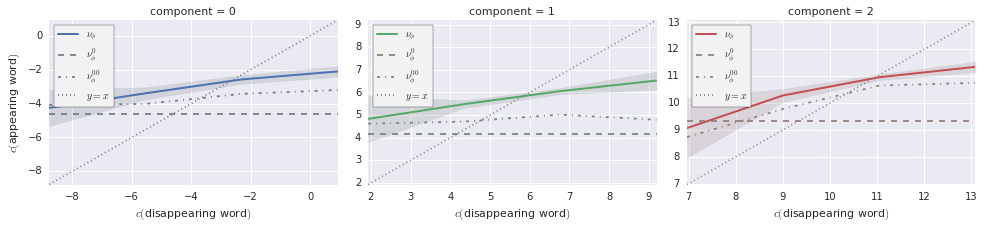

In [25]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `PAPER_FEATURES`). So note the following:

In [26]:
for feature in PAPER_FEATURES:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature) for feature in PAPER_FEATURES]:
    words.update(tfeature())

data = dict((feature, []) for feature in PAPER_FEATURES)
words_list = []
for word in words:
    words_list.append(word)
    for feature in PAPER_FEATURES:
        data[feature].append(Substitution._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'clustering' is based on 5739 words.
Feature 'letters_count' is based on 42786 words.
Feature 'synonyms_count' is based on 147306 words.
Feature 'orthographic_density' is based on 27751 words.



Among all the set of words used by these features, only 3322 are used.

Similarly, we mined 1997 (cluster-unique) substitutions, but the PCA is in fact computed on 864 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.